<a href="https://colab.research.google.com/github/kosarHNajafi/R.Codes/blob/main/RTN_NCA_Finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[1.Discovery Data Set(First Code cell)](#scrollTo=Oyrqhny5FFXs)

>[2.Validation(Second Code Cell)](#scrollTo=QB_Am8m2kixs)

>[1-2.Which Data to Use regarding Discovery Data set?](#scrollTo=BFYwvnKlk7Qq)

>[2.Sample Annotation(Column Annotation)](#scrollTo=T4C7sq_9cKyQ)

>[3.Gene Annotation](#scrollTo=aiQreEAVnV4B)

>[4.Build First rtni-data](#scrollTo=_HmzcQkbeXY3)

>[4-5. Check Normal Distribution](#scrollTo=oXElpMnzuTnO)

>[5.Building Regulons](#scrollTo=xDCQnICdrkle)

>[6.Erichment Score](#scrollTo=hqK0w4fGF9xK)

>[7.build rtni2nd](#scrollTo=bztI7dsJThi7)

>[Regression model for Differential Expression of Genes(DEG)](#scrollTo=KBKdsoL9UiSY)

>[8-1. Linear DEG for 296TF + 1420 MP genes](#scrollTo=NKsSVbK1V7B-)

>[8-2.glmfit model for DEG](#scrollTo=vv9zHh-d4BCf)

>[8-3.glmer model](#scrollTo=3jhboVoQ5lnV)

>[8-4. Voom model](#scrollTo=nFZtd0d34jmG)

>[9.VALIDATION](#scrollTo=ANDx6I_msMho)

>[10.Random Genes](#scrollTo=ooiFT37Kv4OD)

>[11.Heatmap](#scrollTo=H2kM4C5_r4Bp)




# 1.Discovery Data Set(First Code cell)

There are some  non_numeric_elements in Discovery data set;such as NA and "5.14893783197 5.", "11.3176307652 11" "5.455753203 5.36".

before working with all 19220 gene expressions in discovery data set(which one of them is "NA" thus deleted and remained 19219 genes in the row; non_numeric values should be handled.

In [ ]:
#R File from '~/NCA.ER/NCA.METABRIC/METABRIC.NCA.MP.TF.EPSNA.R'
#---Load libraries-----------------
library(biomaRt)
library(RTN)
#---1.Load Gene Expression Data of 90 metabolic pathways and TFs = a mtrix for counts/assays---------------------------------
#load txt. Format for available genes in the discovery dataset
Disc.ALL <- read.delim("~/NCA.ER/data/Disc.Raw.Genes.all.txt",header = TRUE, as.is = TRUE)

sum(is.na(Disc.ALL[, 1]))  # Count the number of NA values
#[1] 1

which(is.na(Disc.ALL[, 1]))  # Identify their positions
#[1] 11028 in the main file not sorted, only metabolic clusters row was removed.
# [1] 10390 in the sorted data based on gene names without 1 and 0 metabolic clusters.

Disc.ALL <- Disc.ALL[-11028,]  # Remove the row with 'NA' as gene name
rownames(Disc.ALL) <- Disc.ALL[,1]
Disc.ALL <- Disc.ALL[,-1]
dim(Disc.ALL)
#[1] 19219  993

str(Disc.ALL)
#'data.frame':	19219 obs. of  993 variables:
#$ MB.0005: chr  "6.24393549" "5.228923847" "6.781157168" "5.583909882" ...
#$ MB.0006: num  6.22 5.91 6.75 5.36 6.08 ...
#$ MB.0008: num  6.06 5.3 7.66 5.3 5.69 ...
#$ MB.0014: num  6.16 5.4 6.68 5.85 5.65 ...

View(Disc.ALL)

colnames(Disc.ALL) <- gsub("\\.", "_", colnames(Disc.ALL))

#Sort data by columnnames(Sample IDs) and rownames(Gene IDs)
Disc.ALL <- Disc.ALL[order(rownames(Disc.ALL)),order(colnames(Disc.ALL))]
View(Disc.ALL)
head(Disc.ALL)
str(Disc.ALL)
#'data.frame':	19219 obs. of  993 variables:
#$ MB_0005: chr  "5.059348923" "9.924912584" "5.421198528" "6.24393549" ...
#$ MB_0006: num  5.37 11.31 5.14 6.22 5.91 ...
#$ MB_0008: num  5.28 9.83 5.56 6.06 5.3 ...
#$ MB_0014: num  5.53 10.68 5.36 6.16 5.4 ...
#$ MB_0020: num  5.28 9.31 5.69 6.16 5.53 ...

#check for NAs
sum(is.na(Disc.ALL))
#[1] 10

which(is.na((rownames(Disc.ALL))))
#integer(0)

#check for non-numeric elements
counts.Disc.all <- as.matrix(Disc.ALL)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements1 <- counts.Disc.all[is.na(as.numeric(counts.Disc.all))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements1)
#[1] 204

write.table(non_numeric_elements1,"~/NCA.ER/NCA.Disc/non_numeric_all.txt",sep = "\t",row.names = FALSE)

# Remove everything after the first space, including trailing digits and an optional dot
counts.Disc.all <- gsub("\\s+\\d+\\.?$", "", counts.Disc.all)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements2 <- counts.Disc.all[is.na(as.numeric(counts.Disc.all))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements2)
#[1] 13

print(non_numeric_elements2)
#[1] "11.60540448 7.88" "5.455753203 5.36" "5.3912438332 5.4" NA
#[5] NA                 NA                 NA                 NA
#[9] NA                 NA                 NA                 NA
#[13] NA

write.table(counts.Disc.all,"~/NCA.ER/data/pre.curated.Disc.all.Genes.txt",sep = "\t",row.names = TRUE)

#Three non_numeric values the end digits were removed manually
Disc.ALL2 <- read.delim("~/NCA.ER/Finalyzing/1.Curating.Data/2.pre.counts.Disc.all.Genes.txt",header = TRUE, as.is = TRUE, row.names = 1)
str(Disc.ALL2)
#'data.frame':	19219 obs. of  993 variables:
#$ MB_0005: num  5.06 9.92 5.42 6.24 5.23 ...
#$ MB_0006: num  5.37 11.31 5.14 6.22 5.91 ...
#$ MB_0008: num  5.28 9.83 5.56 6.06 5.3 ...
#$ MB_0014: num  5.53 10.68 5.36 6.16 5.4 ...
#$ MB_0020: num  5.28 9.31 5.69 6.16 5.53 ...

counts.Disc.all <- as.matrix(Disc.ALL2)
non_numeric_elements3 <- counts.Disc.all[is.na(as.numeric(counts.Disc.all))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements3)
#[1] 10

print(non_numeric_elements3)
#[1] NA NA NA NA NA NA NA NA NA NA

# Convert the matrix to numeric values (after applying gsub)
counts.Disc.all <- apply(counts.Disc.all, c(1, 2), as.numeric)

# Check the structure of the matrix after conversion
str(counts.Disc.all)
#num [1:19219, 1:993] 5.06 9.92 5.42 6.24 5.23 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:19219] "A1CF" "A2M" "A2ML1" "A4GALT" ...
#..$ : chr [1:993] "MB_0005" "MB_0006" "MB_0008" "MB_0014" ...

#Replace NA with the average of the row
counts.Disc.all <- t(apply(counts.Disc.all, 1, function(row) {
  # Replace NA in the row with the mean of non-NA values in that row
  row[is.na(row)] <- mean(row, na.rm = TRUE)
  return(row)
}))

View(counts.Disc.all)

write.table(counts.Disc.all,file = file.path("~/NCA.ER/Finalyzing/1.Curating.Data/","3.Disc.Genes.Curated.txt"),sep = "\t")

# 2.Validation(Second Code Cell)

In the validation data set there is no such problem

In [ ]:
#R File from '~/NCA.ER/Finalyzing/1.Curating.Data/Disc.Curating.R'
#---Load libraries-----------------
library(RTN)
#---1.Load Gene Expression Data of 90 metabolic pathways and TFs = a mtrix for counts/assays---------------------------------
#load txt. Format for available genes in the Validovery dataset
Valid.ALL <- read.delim("~/NCA.ER/data/VALID.Genes.txt",header = TRUE, as.is = TRUE)

sum(is.na(Valid.ALL[, 1]))  # Count the number of NA values
#[1] 1

which(is.na(Valid.ALL[, 1]))  # Identify their positions
#[1] 11028 in the main file not sorted, only metabolic clusters row was removed.
# [1] 10390 in the sorted data based on gene names without 1 and 0 metabolic clusters.

Valid.ALL <- Valid.ALL[-10390,]  # Remove the row with 'NA' as gene name
rownames(Valid.ALL) <- Valid.ALL[,1]
Valid.ALL <- Valid.ALL[,-1]
dim(Valid.ALL)
#[1] 19219  994

str(Valid.ALL)
#'data.frame':	19219 obs. of  994 variables:
#$ MB.0000: num  5.25 9.84 5.34 6.65 5.66 ...
#$ MB.0002: num  5.4 8.32 5.36 6.64 5.32 ...
#$ MB.0010: num  5.46 8.96 5.55 5.66 5.34 ...
#$ MB.0025: num  5.6 10.04 5.18 5.63 5.41 ...
#$ MB.0035: num  5.52 8.8 5.05 5.49 5.16 ...

View(Valid.ALL)

colnames(Valid.ALL) <- gsub("\\.", "_", colnames(Valid.ALL))

#Sort data by columnnames(Sample IDs) and rownames(Gene IDs)
Valid.ALL <- Valid.ALL[order(rownames(Valid.ALL)),order(colnames(Valid.ALL))]
View(Valid.ALL)
head(Valid.ALL)
str(Valid.ALL)
#'data.frame':	19219 obs. of  994 variables:
#$ MB_0000: num  5.25 9.84 5.34 6.65 5.66 ...
#$ MB_0002: num  5.4 8.32 5.36 6.64 5.32 ...
#$ MB_0010: num  5.46 8.96 5.55 5.66 5.34 ...
#$ MB_0025: num  5.6 10.04 5.18 5.63 5.41 ...
#$ MB_0035: num  5.52 8.8 5.05 5.49 5.16 ...

#check for NAs
sum(is.na(Valid.ALL))
#[1] 4

which(is.na((rownames(Valid.ALL))))
#integer(0)

#check for non-numeric elements
counts.Valid.all <- as.matrix(Valid.ALL)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements1 <- counts.Valid.all[is.na(as.numeric(counts.Valid.all))]

length(non_numeric_elements1)
#[1] 4

print(non_numeric_elements1)
#[1] NA NA NA NA

# Check the structure of the matrix after conversion
str(counts.Valid.all)
#num [1:19219, 1:994] 5.25 9.84 5.34 6.65 5.66 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:19219] "A1CF" "A2M" "A2ML1" "A4GALT" ...
#..$ : chr [1:994] "MB_0000" "MB_0002" "MB_0010" "MB_0025" ...

counts.Valid.all <- t(apply(counts.Valid.all, 1, function(row) {
  # Replace NA in the row with the mean of non-NA values in that row
  row[is.na(row)] <- mean(row, na.rm = TRUE)
  return(row)
}))

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements2 <- counts.Valid.all[is.na(as.numeric(counts.Valid.all))]

length(non_numeric_elements2)
#[1] 0

print(non_numeric_elements2)
#numeric(0)

View(counts.Valid.all)

write.table(counts.Valid.all,file = file.path("~/NCA.ER/Finalyzing/1.Curating Data/Valid.Curating Data/","Valid.Genes.Curated.txt"),sep = "\t")

#---Checking the expression of new combined metabolic genes with all genes---------

#Check the data before and after curating nin_numric values
Valid.mp.tf <- read.delim("~/NCA.ER/data/Valid.MP.TF.txt",header = TRUE, as.is = TRUE, row.names = 1)
colnames(Valid.mp.tf) <- gsub("\\.", "_", colnames(Valid.mp.tf))
Valid.mp.tf <- Valid.mp.tf[order(rownames(Valid.mp.tf)),order(colnames(Valid.mp.tf))]

counts.Valid.mp.tf <- as.matrix(Valid.mp.tf)

non_numeric_elements.mp.tf <- counts.Valid.mp.tf[is.na(as.numeric(counts.Valid.mp.tf))]
print(non_numeric_elements.mp.tf)
#numeric(0)

#Valid.genes.all-->curated-->Valid.mp.tf OR Valid.genes.all-->Valid.mp.tf-->curated
test <- intersect(rownames(counts.Valid.all),rownames(Valid.mp.tf))
test2 <- counts.Valid.all[test,]
all.equal(counts.Valid.mp.tf,test2) #[1] TRUE

save.image("~/NCA.ER/Finalyzing/1.Curating Data/Valid.Curating Data/Valid.all.Genes.Curated.RData")



# 1-2.Which Data to Use regarding Discovery Data set?
(*Not mentioned in the disc.all.genes project)

Since there were no NA, manually curated from the main source will be used for metabolic genes plus TF genes in up coming next sections => Manually curated from the original file

At the first step to compare the expression data, It began with loading the disc.mp.tf which stands for discovery data set metabolic genes and transcription factor genes I wanted to show non_numeric elements that have been curated to get the expression matrix that here is named as "test" data.

After curating the Discovery dataset from non_numeric elements;
I checked the difference between the time I took metabolic genes and transcription factor genes directly from discovery data set before curating which I have used through all my analysis here named as "test" VS. the time I took the same genes expression after curating discovery data set named as "test3". they have 3.667215e-08 mean difference indeed.

In [ ]:
rtni_disc_mp.tf.NUM <- tni.constructor(expData = disc_mp.tf.NUM$expData,
#                                     +                              regulatoryElements = regulatoryElements,
#                                     +                              rowAnnotation = disc_mp.tf.NUM$rowAnnotation,
#                                     +                              colAnnotation = disc_mp.tf.NUM$colAnnotation)
#-Preprocessing for input data...
#Error: 'expData' should be a numeric matrix with genes on rows and
#samples on cols!

#Values are not numeric

#---Checking the expression of new combined metabolic genes with all genes---------

#Check the data before and after curating nin_numric values
disc.mp.tf <- read.delim("~/NCA.ER/data/DISC.MP.TF.Genes.txt",header = TRUE, as.is = TRUE, row.names = 1)
counts.disc.mp.tf <- as.matrix(disc.mp.tf)

non_numeric_elements.mp.tf <- counts.disc.mp.tf[is.na(as.numeric(counts.disc.mp.tf))]
print(non_numeric_elements.mp.tf)
#[1] "5.24408565936 5." "5.266270898297 5" "7.08498028378 6." "5.475669392427 5"
#[5] "5.529674338976 5" "6.530990146544 7" "6.245621615493 6" "5.748945951723 5"
#[9] "6.67129437167 7." "5.883760590443 5" "7.607295123545 8" "6.391411320326 6"
#[13] "5.261103082174 5" "6.419634552761 5"

#Disc.genes.all-->curated-->disc.mp.tf OR disc.genes.all-->disc.mp.tf-->curated
test <- read.delim("~/NCA.ER/data/DISC.MP.TF.Curated.txt",header = TRUE, as.is = TRUE, row.names = 1)
colnames(test) <- gsub("\\.", "_", colnames(test))
test <- test[order(rownames(test)),order(colnames(test))]
test <- as.matrix(test)
test2 <- intersect(rownames(counts.Disc.all),rownames(test))
test3 <- counts.Disc.all[test2,]
all.equal(test,test3) #[1] "Mean relative difference: 3.667215e-08"


save.image("~/NCA.ER/Finalyzing/1.Curating.Data/Disc.all.Genes.Curated.RData")


# 2.Sample Annotation(Column Annotation)
METABRIC Clinical file was retrieved from [cBioPortal](https://www.cbioportal.org/study/clinicalData?id=brca_metabric)


In [ ]:
Metabric_Manual_disc <- read.delim("~/NCA/data/METABRIC Clinical.txt", row.names = 1)
View(Metabric_Manual_disc)

Metabric_Manual_disc <- Metabric_Manual_disc[order(rownames(Metabric_Manual_disc)),]
View(Metabric_Manual_disc)

# Replace dots with underscores in column names if needed
rownames(Metabric_Manual_disc) <- gsub("\\-", "_", rownames(Metabric_Manual_disc))
View(Metabric_Manual_disc)

# Load required library
library(dplyr)

# Assuming your dataset is named Metabric_Manual_disc
# Create a new binary dataframe based on transformations
Metabric_Manual_disc <- Metabric_Manual_disc %>%
  transmute(
    IDs = rownames(Metabric_Manual_disc),
    Cohort = Cohort,

    OS.time = Overall.Survival..Months.,
    OS.event = ifelse(Overall.Survival.Status == "1:DECEASED", 1, 0),
    DSS.event = ifelse(Patient.s.Vital.Status == "Died of Disease", 1, 0),
    RFS.event = ifelse(Relapse.Free.Status == "1:Recurred", 1, 0),
    RFS.time = Relapse.Free.Status..Months.,

    Grade = Neoplasm.Histologic.Grade,
    Size = Tumor.Size,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,


    # Subtypes for LumA, LumB, Basal, Her2, Normal based on Pam50 subtype
    LumA = ifelse(Pam50...Claudin.low.subtype == "LumA", 1, 0),
    LumB = ifelse(Pam50...Claudin.low.subtype == "LumB", 1, 0),
    Basal = ifelse(Pam50...Claudin.low.subtype == "Basal", 1, 0),
    Her2 = ifelse(Pam50...Claudin.low.subtype == "Her2", 1, 0),
    Normal = ifelse(Pam50...Claudin.low.subtype == "Normal", 1, 0),

    # ER and PR status (positive and negative)
    `ER+` = ifelse(ER.Status == "Positive", 1, 0),
    `ER-` = ifelse(ER.Status == "Negative", 1, 0),


    # Histologic Grade categories G1, G2, G3
    G1 = ifelse(Neoplasm.Histologic.Grade == 1, 1, 0),
    G2 = ifelse(Neoplasm.Histologic.Grade == 2, 1, 0),
    G3 = ifelse(Neoplasm.Histologic.Grade == 3, 1, 0),

    # Hormone Therapy (HT)
    HT = ifelse(Hormone.Therapy == "YES", 1, 0),

  )
View(Metabric_Manual_disc)

# Print head of the colAnnotation for verification
head(Metabric_Manual_disc)

In [ ]:
#---Converting Metabric Clinical data into Sample Annotation---
Disc_sample_all_ids <- colnames(counts.Disc.genes)
View(Disc_sample_all_ids)
length(Disc_sample_all_ids)
#[1] 993
sort(Disc_sample_all_ids)
View(Disc_sample_all_ids)
length(Disc_sample_all_ids)
#[1] 993

all.equal(Disc_sample_all_ids,colnames(counts.Disc.genes))
#[1] TRUE

# Find the common sample IDs between the two datasets
common_samples_Disc <- intersect(rownames(Metabric_Manual_disc), Disc_sample_all_ids)
common_samples_Disc <- sort(common_samples_Disc)
View(common_samples_Disc)
length(common_samples_Disc)
#[1] 987

# Subset and reorder both datasets to only include common samples
counts.Disc.genes <- counts.Disc.genes[, common_samples_Disc]
all.equal(rownames(counts.Disc.genes), rownames(counts.Disc.genes))
#[1] TRUE
View(counts.Disc.genes)
dim(counts.Disc.genes)
#[1] 19219  988

sampleAnnotation.Disc <- Metabric_Manual_disc[common_samples_Disc, ]
dim(sampleAnnotation.Disc)
#[1] 988   22

# Verify that they are aligned
all.equal(colnames(counts.Disc.genes), rownames(sampleAnnotation.Disc))  # Should return TRUE
#[1] TRUE

# If the first is not TRUE, you can match up the samples/columns in
# counts with the samples/rows in sampleAnnotation.Disc like this (which is fine
# to run even if the first was TRUE):

#tempindex <- match(colnames(counts.Disc.genes), rownames(sample_metadata))
#sampleAnnotation.Disc <- sample_metadata[tempindex, ]

#Check again

#all.equal(colnames(counts.Disc.genes), rownames(sampleAnnotation.Disc))


# 3.Gene Annotation

	ensembl_gene_id	chromosome_name	start_position	end_position	strand	external_gene_name	description
	ENSG00000275841	HSCHR19_4_CTG3_1	270964	275840	-1	LILRA3	leukocyte immunoglobulin like receptor A3 [Source:HGNC Symbol;Acc:HGNC:6604]
	ENSG00000288357	HSCHR19KIR_CA01-TB01_CTG3_1	134766	160497	1	KIR2DL5A	killer cell immunoglobulin like receptor, two Ig domains and long cytoplasmic tail 5A [Source:HGNC Symbol;Acc:HGNC:16345]
	ENSG00000288487	HSCHR19KIR_CA01-TB04_CTG3_1	134746	160298	1	KIR2DS3	killer cell immunoglobulin like receptor, two Ig domains and short cytoplasmic tail 3 [Source:HGNC Symbol;Acc:HGNC:6335]
	ENSG00000230463	HSCHR6_MHC_APD_CTG1	3824514	3837642	-1	HLA-DRB3	major histocompatibility complex, class II, DR beta 3 [Source:HGNC Symbol;Acc:HGNC:4951]
	ENSG00000227826	HSCHR6_MHC_MANN_CTG1	3840435	3855431	-1	HLA-DRB4	major histocompatibility complex, class II, DR beta 4 [Source:HGNC Symbol;Acc:HGNC:4952]

5 Gene were missed from all genes analysis at the first time "Since the total number of genes are high and to be able to track reproducibility" these genes were ignored at the second run as well.

This is the suggested code instead of the codes for this section:
But according to browseVignettes("biomaRt") [link text](http://127.0.0.1:31622/library/biomaRt/doc/accessing_ensembl.html): I would prefer to use the command with useEnsembl() instead of usemart()

> If you are using biomaRt directly make sure you are using useEnsembl() to create the Mart object, rather than useMart(). useEnsembl() is aware of some specific connection details required to connect to Ensembl, and using it may fix any connection problems without requiring you to do anything further.


mart <- useMart('ENSEMBL_MART_ENSEMBL')
mart <- useDataset('hsapiens_gene_ensembl', mart)

annot <- getBM(values = rownames(DISC.Genes), filters = "external_gene_name",mart = mart,
               attributes = c("ensembl_gene_id", "chromosome_name",
                              "start_position", "end_position", "strand","gene_biotype",
                              "external_gene_name","description"))

In [ ]:
#---4.Load Ensemble Gene Annotation----------------------------------------------

#1.Accessing the data available in Ensembl by biomaRT
browseVignettes("biomaRt")

#2.Selecting an Ensembl BioMart database and dataset

# Connect to Ensembl database, and query human genes
ensembl <- useEnsembl(biomart = "genes", dataset = "hsapiens_gene_ensembl")
#Ensembl site unresponsive, trying asia mirror


#2.1##Step1: Identifying the database you need

#find the names of the BioMart services Ensembl is currently providing
##and Can be used to connect to the desired BioMart database:
listEnsembl()
#biomart                version
#1         genes      Ensembl Genes 113
#2 mouse_strains      Mouse strains 113
#3          snps  Ensembl Variation 113
#4    regulation Ensembl Regulation 113

#biomart argument should be given a valid name from the output of listEnsembl()
ensembl <- useEnsembl(biomart = "genes")
#Ensembl site unresponsive, trying useast mirror

#2.2##Step 2: Choosing a dataset

#Within the Ensembl dataset each species is a different dataset.
#look at which datasets are available in the selected BioMart
#by using the function listDatasets()
datasets <- listDatasets(ensembl)
View(datasets)

##Because the listDatasets are so long
##in ensembl mart find anything that contain the term ‘hsapiens’

searchDatasets(mart = ensembl, pattern = "hsapiens")
#dataset              description    version
#80 hsapiens_gene_ensembl Human genes (GRCh38.p14) GRCh38.p14

#If you've been through these all before;select a both the database and dataset in one step
ensembl <- useDataset(dataset = "hsapiens_gene_ensembl", mart = ensembl)


#2.3##Ensembl mirror sites
#listMarts() to find the biomart
ensembl <- useEnsembl(biomart = "ENSEMBL_MART_ENSEMBL",
                      dataset = "hsapiens_gene_ensembl",
                      mirror = "useast")
#Ensembl site unresponsive, trying asia mirror
#maintain consistent annotation throughout the duration of a project.

#2.4##Using archived versions of Ensembl, with no arguments
listEnsemblArchives()
#name     date                                 url version current_release
#1  Ensembl GRCh37 Feb 2014          https://grch37.ensembl.org  GRCh37
#2     Ensembl 113 Oct 2024 https://oct2024.archive.ensembl.org     113               *
#  3     Ensembl 112 May 2024 https://may2024.archive.ensembl.org     112
#4     Ensembl 111 Jan 2024 https://jan2024.archive.ensembl.org     111
#5     Ensembl 110 Jul 2023 https://jul2023.archive.ensembl.org     110
#6     Ensembl 109 Feb 2023 https://feb2023.archive.ensembl.org     109
#7     Ensembl 108 Oct 2022 https://oct2022.archive.ensembl.org     108
#8     Ensembl 107 Jul 2022 https://jul2022.archive.ensembl.org     107
#9     Ensembl 106 Apr 2022 https://apr2022.archive.ensembl.org     106
#10    Ensembl 105 Dec 2021 https://dec2021.archive.ensembl.org     105
#11    Ensembl 104 May 2021 https://may2021.archive.ensembl.org     104
#12    Ensembl 103 Feb 2021 https://feb2021.archive.ensembl.org     103
#13    Ensembl 102 Nov 2020 https://nov2020.archive.ensembl.org     102
#14    Ensembl 101 Aug 2020 https://aug2020.archive.ensembl.org     101
#15    Ensembl 100 Apr 2020 https://apr2020.archive.ensembl.org     100
#16     Ensembl 99 Jan 2020 https://jan2020.archive.ensembl.org      99
#17     Ensembl 98 Sep 2019 https://sep2019.archive.ensembl.org      98
#19     Ensembl 77 Oct 2014 https://oct2014.archive.ensembl.org      77
#20     Ensembl 75 Feb 2014 https://feb2014.archive.ensembl.org      75
#21     Ensembl 54 May 2009 https://may2009.archive.ensembl.org      54

listEnsembl(version = 113)
#biomart                version
#1         genes      Ensembl Genes 113
#2 mouse_strains      Mouse strains 113
#3          snps  Ensembl Variation 113
#4    regulation Ensembl Regulation 113

#to ensure that script you write now will return exactly the same results in the future;
##copy the URL from listEnsemblArchive() or www.ensembl.org in host Argument
ensembl_113 <- useEnsembl(biomart = "genes",
                          dataset = "hsapiens_gene_ensembl",
                          host = "https://oct2024.archive.ensembl.org",
                          version = 113)

searchDatasets(mart = ensembl_113, pattern = "hsapiens")
#dataset              description    version
#80 hsapiens_gene_ensembl Human genes (GRCh38.p14) GRCh38.p14

# Extract gene annotations for the corresponding genes from `ensembl_113`
filters = listFilters(ensembl_113)
View(filters)

View(listAttributes(ensembl_113))

gene_annot_all_Disc <- getBM(
  attributes = c("ensembl_gene_id", "chromosome_name", "start_position", "end_position", "strand", "external_gene_name","description","gene_biotype"),
  filters = "external_gene_name",
  values = rownames(counts.Disc.all),
  mart = ensembl_113
)
View(gene_annot_all_Disc)
dim(gene_annot_all_Disc) #[1] 21574     8

#WITH ENTREZ 3185 AND WITHOUT THAT 3152, DON'T MENTION "entrezgene_id".

# Check for duplicated external_gene_names
table(duplicated(gene_annot_all_Disc$external_gene_name))
#FALSE  TRUE
#18520  3054

#To check with Previously retrieved gene annotations

#annotation <- read.delim("~/NCA.ER/Gene_annot_all.metabric.biotype.retrieved.txt",header = TRUE, as.is = TRUE)
#identical(annotation,gene_annot_all_Disc) #[1] TRUE

#annotation2 <- read.delim("~/NCA.ER/Gene_annot_all.metabric.retrieved.txt",header = TRUE, as.is = TRUE)
#identical(gene_annot_all_Disc[,-8],annotation2) #[1] TRUE

write.table(gene_annot_all_Disc1,file = file.path("~/NCA.ER/","Gene_annot_all.Disc.biotype.retrieved.txt"),sep = "\t",row.names = FALSE)
save.image("~/NCA.ER/NCA.Disc/NCA.Disc/up.to.gene.annot.RData")


The Following Section is used

In [ ]:
#--- 3. Gene Annotation Data----
#Duplicates Removed Manually
Disc.Gene.Annot.Curated <- read.delim("~/NCA.ER/Gene_Annot_All_Used_ENS113.txt")
table(duplicated(Disc.Gene.Annot.Curated$external_gene_name))
#FALSE
#18515

dim(Disc.Gene.Annot.Curated)
#[1] 18515     7
length(Disc.Gene.Annot.Curated)
View(Disc.Gene.Annot.Curated)
dim(counts.Disc.genes)
#[1] 19219  988

#Only Validated IDs Taken
# Extract gene IDs from both datasets
ensemble_ids <- Disc.Gene.Annot.Curated$external_gene_name
View(ensemble_ids)
ensemble_ids <- sort(ensemble_ids)
length(ensemble_ids) #[1] 18515

Disc_all_gene_ids <- rownames(counts.Disc.genes )
View(Disc_all_gene_ids)

common_genes <- intersect(Disc.Gene.Annot.Curated$external_gene_name, Disc_all_gene_ids) # Should match or be close to 1420
common_genes <- sort(common_genes)
all.equal(ensemble_ids, common_genes) #[1] TRUE
length(common_genes)
#[1] 18515

# Subset and reorder both datasets to only include common samples
counts.Disc.genes <- counts.Disc.genes[common_genes, ]
View(counts.Disc.genes)

all.equal(ensemble_ids,rownames(counts.Disc.genes))

#Set rownames for gene annotation, %n% doesn't let your data go NA
Disc.Gene.Annot.Curated <- Disc.Gene.Annot.Curated[Disc.Gene.Annot.Curated$external_gene_name %in% common_genes, ]
rownames(Disc.Gene.Annot.Curated) <- Disc.Gene.Annot.Curated$external_gene_name
Disc.Gene.Annot.Curated <- Disc.Gene.Annot.Curated[order(rownames(Disc.Gene.Annot.Curated)),]
View(Disc.Gene.Annot.Curated)
all.equal(Disc.Gene.Annot.Curated$external_gene_name, rownames(counts.Disc.genes))
all.equal(Disc.Gene.Annot.Curated$external_gene_name,rownames(Disc.Gene.Annot.Curated))
all.equal(Disc.Gene.Annot.Curated$external_gene_name,common_genes)
all.equal(common_genes,ensemble_ids)

#Sort counts.Disc.genes and gene_annot_all_Disc based on rownames which is gene names
counts.Disc.genes <- counts.Disc.genes[order(rownames(counts.Disc.genes)), ]
Disc.Gene.Annot.Curated <- Disc.Gene.Annot.Curated[order(rownames(Disc.Gene.Annot.Curated)), ]

all.equal(rownames(counts.Disc.genes), rownames(Disc.Gene.Annot.Curated))  #[1] TRUE
dim(counts.Disc.genes) #[1] 18515   988
dim(Disc.Gene.Annot.Curated) #[1] 18515     7
View(Disc.Gene.Annot.Curated)

#In rtni analysis it needs "SYMBOL" in rowAnnotation
colnames(Disc.Gene.Annot.Curated)
colnames(Disc.Gene.Annot.Curated)[colnames(Disc.Gene.Annot.Curated) == "external_gene_name"] <- "SYMBOL"
colnames(Disc.Gene.Annot.Curated)[colnames(Disc.Gene.Annot.Curated) == "ensembl_gene_id"] <- "ENSEMBL"

# Verify the change
colnames(Disc.Gene.Annot.Curated)


# One final check:
stopifnot(rownames(Disc.Gene.Annot.Curated) == rownames(counts.Disc.genes), # features
          rownames(sampleAnnotation.Disc) == colnames(counts.Disc.genes)) # samples

save(list = ls(), file = file.path("~/NCA.ER/NCA.MP.TF.DISC.NCA/", "1.Data before List.RData")


In [ ]:
#One can alternatively use the code below(In our case wasn't done like this)
library(biomaRt)
mart <- useMart('ENSEMBL_MART_ENSEMBL')
mart <- useDataset('hsapiens_gene_ensembl', mart)

annot <- getBM(values = rownames(DISC.Genes), filters = "external_gene_name",mart = mart,
               attributes = c("ensembl_gene_id", "chromosome_name",
                              "start_position", "end_position", "strand","gene_biotype",
                              "external_gene_name","description"))
table(duplicated(annot$external_gene_name))



#4.Build First rtni-data

In [ ]:
#---4. Prepare for rtni---
Disc_all <- list(
  expData = counts.Disc.all,                       # expData as an assay
  rowAnnotation = Disc.Gene.Annot.Curated,             # Gene annotations (row metadata)
  colAnnotation = sampleAnnotation.Disc           # Sample annotations (column metadata)
)

View(Disc_all)

#---Load RegulatoryElements---
library(RTN)
# Load TF annotation
data("tfsData")

# Check TF annotation:
# Intersect TFs from Lambert et al. (2018) with gene annotation
# from the gene expression of 90 metabolic pathway cohort
regulatoryElements <- intersect(tfsData$Lambert2018$SYMBOL, Disc_all$rowAnnotation$SYMBOL)
View(regulatoryElements)
regulatoryElements <- sort(regulatoryElements)
View(regulatoryElements)

#---constructing rtni---
#This dataset consists of a list with 3 objects:
##a named gene expression matrix (tniData$expData),
##a data frame with gene annotations (tniData$rowAnnotation),
##and a data frame with sample annotations (tniData$colAnnotation).
##alternatively, 'expData' can be a 'SummarizedExperiment' object
rtni_disc_all <- tni.constructor(expData = Disc_all$expData,
                                   regulatoryElements = regulatoryElements,
                                   rowAnnotation = Disc_all$rowAnnotation,
                                   colAnnotation = Disc_all$colAnnotation)

#-Preprocessing for input data...
#--Mapping 'expData' to 'rowAnnotation'...
#--Mapping 'expData' to 'colAnnotation'...
#--Checking 'regulatoryElements' in 'rowAnnotation'...
#-Checking 'expData'...
#-Preprocessing complete!

save(rtni_disc_all, file = file.path("~/NCA.ER/NCA.MP.TF.DISC.NCA/", "2.rtni_disc_all.constructed.RData"))



# 4-5. Check Normal Distribution
 [The histogram that is created shows the gene expression data in not normally distributed; since it doesnt look bell shaped.](https://www.statology.org/test-for-normality-in-r/)

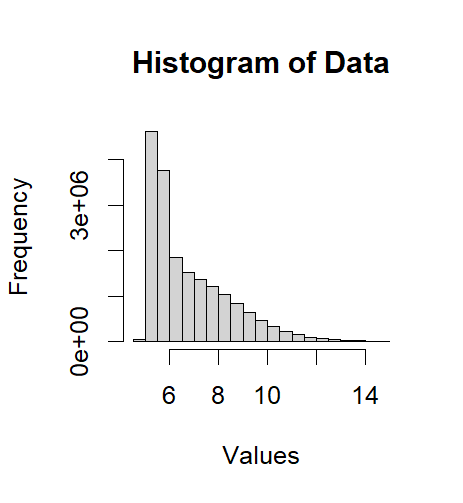

Validation:


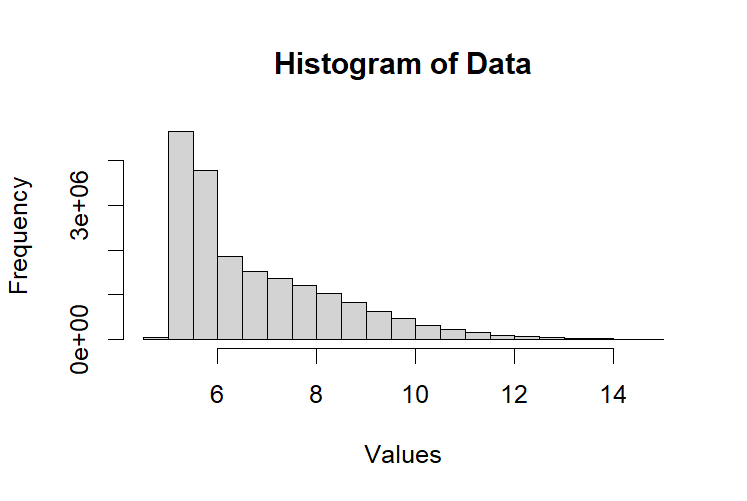

In [ ]:
hist(counts.Disc.genes, breaks = 30, main = "Histogram of Data", xlab = "Values")
q <- qqnorm(counts.Disc.genes)
save(list = ls(), file = "3.rtni_hist_before_permutation.RData")

#5.Building Regulons


In [ ]:
rtni_Disc_all <- tni.permutation(rtni_disc_all,
                                 nPermutations = 10000,
                                 estimator = "spearman",
                                 verbose = TRUE)

#-Performing permutation analysis...
#--For 1508 regulons...
#|=================================================================================================| 100%
#-Permutation analysis complete!
save(rtni_Disc_all,file = "5.rtni_Disc_all.RData")

#Unstable interactions are subsequently removed by bootstrap analysis,
##creates a consensus bootstrap network, referred here as refnet (reference network).
rtni_Disc_all <- tni.bootstrap(rtni_Disc_all)



Extract Regulons in txt. format

In [ ]:
# Find the maximum number of genes across all regulons
max_genes <- max(sapply(regulon.NA, function(x) if (is.null(x)) 0 else length(x)))

# Create a list of data frames with equal row lengths
regulon_list <- lapply(names(regulon.NA), function(regulon_name) {
  regulon_data <- regulon.NA[[regulon_name]]

  # Handle empty or NULL regulons
  if (is.null(regulon_data) || length(regulon_data) == 0) {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  } else if (is.vector(regulon_data)) {
    # Ensure matching lengths for Gene and Value
    genes <- names(regulon_data)
    values <- regulon_data
    if (length(genes) == 0) genes <- rep(NA, length(values))
    df <- data.frame(
      Gene = genes,
      Value = values,
      stringsAsFactors = FALSE
    )
  } else if (is.matrix(regulon_data) || is.data.frame(regulon_data)) {
    df <- data.frame(
      Gene = rownames(regulon_data),
      Value = regulon_data[, 1], # Assuming values are in the first column
      stringsAsFactors = FALSE
    )
  } else {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  }

  # Extend to max_genes rows if needed
  if (nrow(df) < max_genes) {
    df <- rbind(df, data.frame(
      Gene = rep(NA, max_genes - nrow(df)),
      Value = rep(NA, max_genes - nrow(df))
    ))
  }

  # Rename columns with regulon names
  colnames(df) <- c(paste0(regulon_name, "_Gene"), paste0(regulon_name, "_Value"))
  return(df)
})

# Combine all into one data frame
regulon_df <- do.call(cbind, regulon_list)

# Write to file
write.table(regulon_df, file = ("Valid.regulon.NA.txt"), sep = "\t", row.names = FALSE, quote = FALSE)
save(regulon.NA,file = "Valid.All.Genes.Regulon.NA.RData")


#6.[Erichment Score](https://davidbioinformatics.nih.gov/helps/functional_annotation.html#fisher)

Condition1: TFs with adj.pvalue<0.05 were taken for rtni2nd

Condition2: TFs with adj.pvalue<0.05 and LH>=15 were taken

Condition3: TFs with adj.pvalue<0.05 and LT>=15 were taken


In [ ]:
# Load necessary libraries
library(stats)

# Load data
load("C:/NCA.ER/Finalyzing/2.All.Genes/Disc.all.genes/Disc.All.Genes.Regulon.NA.RData")
pathway <- read.delim("~/NCA.ER/data/Pathway_Counts_PathwaySheet.txt", header = TRUE)

# Inspect data structure
str(regulon.NA)
#List of 1508
#$ ADNP     : Named num [1:123] -0.0353 -0.0827 -0.0803 -0.0928 -0.0159 ...
#..- attr(*, "names")= chr [1:123] "ABHD6" "ACVRL1" "ADAMTS9" "ADCY4" ...
#$ ADNP2    : Named num [1:91] -0.0803 -0.0457 -0.0804 -0.0338 0.0288 ...
#..- attr(*, "names")= chr [1:91] "ABCA7" "ABHD14B" "ABHD17A" "ACTR1B" ...
#$ AEBP1    : Named num [1:189] 0.0488 0.1225 0.1325 0.0871 0.0897 ...

str(pathway)
#'data.frame':	1932 obs. of  2 variables:
#$ Metabolic_Pathways: chr  "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" ...
#$ Genes             : chr  "GPT" "GPT2" "ACY3" "AGXT" ...

# Extract the list of genes from the metabolic pathway
metabolic_pathway_genes <- pathway$Genes

# Compare genes in regulons with metabolic pathway genes
LH <- lapply(regulon.NA, function(regulon) {
  intersect(names(regulon), metabolic_pathway_genes)
})

# Count how many target genes from each regulon are in the metabolic pathway list
LH_counts <- sapply(LH, length)

# Filter out regulons with matches
LH_filtered <- LH[LH_counts > 0]

# Calculate LH ratios with additional details
LH_ratio <- sapply(names(LH_filtered), function(regulon) {
  num_LH <- length(LH_filtered[[regulon]])  # Number of LH genes
  total_genes <- length(names(regulon.NA[[regulon]]))  # LT in the regulon
  ratio <- num_LH / total_genes  # Calculate ratio

  # Return details as a list
  return(c(Regulon = regulon,
           LH = num_LH,
           Total_Genes = total_genes,
           Ratio = ratio))
})

# Convert ratios to a data frame
ratio_df <- as.data.frame(t(LH_ratio), stringsAsFactors = FALSE)
ratio_df$LH <- as.numeric(ratio_df$LH)
ratio_df$Total_Genes <- as.numeric(ratio_df$Total_Genes)
ratio_df$Ratio <- as.numeric(ratio_df$Ratio)

# Define global variables
PH <- 1420  # Total number of recon metabolic genes (Population Hits)
PT <- 30000 # Total number of genes in human genome (Population Total)

# Initialize a list to store contingency tables
contingency_tables <- list()

# Perform Fisher's exact test and save contingency tables
fisher_p_values <- sapply(names(LH_filtered), function(regulon) {
  num_LH <- length(LH_filtered[[regulon]])  # Number of LH genes (Hits)
  total_genes <- length(names(regulon.NA[[regulon]]))  # LT in the regulon (Total Genes)
  num_not_LH <- total_genes - num_LH  # Not hits in regulon
  num_in_metabolic <- PH - num_LH  # Remaining metabolic genes not in regulon
  num_outside_all <- PT - total_genes - num_in_metabolic  # Remaining genes not in regulon or metabolic pathways

  # Construct contingency table
  contingency_table <- matrix(c(
    num_LH, num_in_metabolic,         # In Metabolic Pathways
    num_not_LH, num_outside_all       # Not In Metabolic Pathways
  ), nrow = 2, byrow = TRUE,
  dimnames = list(c("In_Metabolic_Pathways", "Not_In_Metabolic_Pathways"),
                  c("In_Regulon", "Not_In_Regulon")))

  # Save the contingency table for later inspection
  contingency_tables[[regulon]] <<- contingency_table

  # Perform Fisher's exact test
  fisher_result <- fisher.test(contingency_table, alternative = "greater")
  return(fisher_result$p.value)
})

# Adjust p-values using Benjamini-Hochberg correction
fisher_adjusted_p_values <- p.adjust(fisher_p_values, method = "BH")

# Consolidate all results into a data frame
fisher_result_df <- data.frame(
  Regulon = names(LH_filtered),
  LH = sapply(LH_filtered, length),
  Total_Genes = sapply(names(LH_filtered), function(regulon) length(names(regulon.NA[[regulon]]))),
  Ratio = sapply(names(LH_filtered), function(regulon) {
    num_LH <- length(LH_filtered[[regulon]])
    total_genes <- length(names(regulon.NA[[regulon]]))
    return(num_LH / total_genes)
  }),
  Fisher_P_Value = fisher_p_values,
  Fisher_FDR = fisher_adjusted_p_values,
  stringsAsFactors = FALSE
)

# Sort by FDR for better interpretation
fisher_result_df <- fisher_result_df[order(fisher_result_df$Fisher_FDR), ]

# Save results to files
write.table(fisher_result_df, "Disc.regulon_fisher_enrichment_results.txt", sep = "\t", row.names = FALSE)
save(contingency_tables, file = "contingency_tables.RData")

# View a specific table, e.g., for "ADNP"
contingency_tables[["ADNP"]]

disc.session.info <- sessionInfo()
sessionInfo()
#R version 4.4.1 (2024-06-14 ucrt)
#Platform: x86_64-w64-mingw32/x64
#Running under: Windows 11 x64 (build 26100)

#Matrix products: default


#locale:
#  [1] LC_COLLATE=English_United Arab Emirates.utf8
#[2] LC_CTYPE=English_United Arab Emirates.utf8
#[3] LC_MONETARY=English_United Arab Emirates.utf8
#[4] LC_NUMERIC=C
#[5] LC_TIME=English_United Arab Emirates.utf8

#time zone: Asia/Dubai
#tzcode source: internal

#attached base packages:
#  [1] stats     graphics  grDevices utils     datasets  methods   base

#other attached packages:
#  [1] RTN_2.28.0  dplyr_1.1.4

#loaded via a namespace (and not attached):
#  [1] SummarizedExperiment_1.34.0 gtable_0.3.6
#[3] ggplot2_3.5.1               htmlwidgets_1.6.4
#[5] Biobase_2.64.0              lattice_0.22-6
#[7] vctrs_0.6.5                 tools_4.4.1
#[9] generics_0.1.3              stats4_4.4.1
#[11] parallel_4.4.1              tibble_3.2.1
#[13] proxy_0.4-27                pkgconfig_2.0.3
#[15] pheatmap_1.0.12             Matrix_1.7-1
#[17] KernSmooth_2.23-24          data.table_1.16.2
#[19] RColorBrewer_1.1-3          S4Vectors_0.42.1
#[21] lifecycle_1.0.4             GenomeInfoDbData_1.2.12
#[23] compiler_4.4.1              viper_1.38.0
#[25] mixtools_2.0.0              statmod_1.5.0
#[27] munsell_0.5.1               carData_3.0-5
#[29] GenomeInfoDb_1.40.1         snow_0.4-4
#[31] htmltools_0.5.8.1           class_7.3-22
#[33] lazyeval_0.2.2              Formula_1.2-5
#[35] plotly_4.10.4               car_3.1-3
#[37] pillar_1.10.0               crayon_1.5.3
#[39] tidyr_1.3.1                 MASS_7.3-61
#[41] DelayedArray_0.30.1         limma_3.60.6
#[43] RedeR_3.0.0                 abind_1.4-8
#[45] nlme_3.1-166                tidyselect_1.2.1
#[47] digest_0.6.37               kernlab_0.9-33
#[49] purrr_1.0.2                 splines_4.4.1
#[51] fastmap_1.2.0               grid_4.4.1
#[53] SparseArray_1.4.8           colorspace_2.1-1
#[55] cli_3.6.3                   magrittr_2.0.3
#[57] S4Arrays_1.4.1              survival_3.8-3
#[59] e1071_1.7-16                scales_1.3.0
#[61] UCSC.utils_1.0.0            minet_3.62.0
#[63] segmented_2.1-3             XVector_0.44.0
#[65] httr_1.4.7                  matrixStats_1.4.1
#[67] igraph_2.1.2                pwr_1.3-0
#[69] GenomicRanges_1.56.2        IRanges_2.38.1
#[71] viridisLite_0.4.2           rlang_1.1.4
#[73] glue_1.8.0                  BiocGenerics_0.50.0
#75] rstudioapi_0.17.1           jsonlite_1.8.9
#[77] R6_2.5.1                    MatrixGenerics_1.16.0
#[79] zlibbioc_1.50.0
save(list = ls(),file = "1,2.Disc.TF.Choosing.RData")
save.image(file = "1,2.Disc.TF.chooseing.RData")
contingency_tables1 <- stack(contingency_tables)
write.table(contingency_tables,file = "contingency.txt",sep = "\t")


#7.build rtni2nd

TFs with adj.Pvalue < 0.05 from enrichment score were chosen to be combined with 1420 metabolic genes expression to

the same codes as used for rtni1st.

Discovery data set: 296TFs

#8. Regression model for Differential Expression of Genes(DEG)
✅[The limma package](https://www.bioconductor.org/packages/devel/bioc/vignettes/limma/inst/doc/usersguide.pdf):


1.   Employs linear model to assess differential gene expression and analyze designed microarray experiments
2.   Design Matrix: a crucial component that specifies how the RNA samples are related to the arrays in the experiment.
(In this case, ER.positive Vs. ER.negative)

1.   Contrast Matrix: is used to make comparisons between the RNA samples
2.   part of codes from library(Fletcher2013a):

    `>Fletcher2013pipeline.limma

    ...myContrasts <- notes(exprSet)$contrasts

    f <- factor(targets$Target)

    design <- model.matrix(~0 + f)

    colnames(design) <- levels(f)

    fit <- lmFit(gexp, design)

    myContrasts <- makeContrasts(contrasts = myContrasts, levels = design)

    contrastsFit <- eBayes(contrasts.fit(fit, myContrasts))...`







#8-1. Linear DEG for 296TF + 1420 MP genes
❌condition1:

   hits(23 MPgenes) = phenotype with adj.pvalue<0.05 and abs(logFC)>1
   Error in building rtna:
   > Error: NOTE: 98.7% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!



In [ ]:
#--8-1.Metabolic Genes data----
#Since the samples are the same sampleAnnotation.disc_tna will be used
Disc.MP.Genes <- read.delim("~/NCA.ER/data/DISC.MP.Genes.txt",header = TRUE, row.names = 1)
View(Disc.MP.Genes)

#Order by rownames and colnames
Disc.MP.Genes <- Disc.MP.Genes[order(rownames(Disc.MP.Genes)),order(colnames(Disc.MP.Genes))]

# Replace dots with underscores in column names if needed
colnames(Disc.MP.Genes) <- gsub("\\.", "_", colnames(Disc.MP.Genes))

View(Disc.MP.Genes)
dim(Disc.MP.Genes) #[1] 1420  993

counts.mp.disc <- as.matrix(Disc.MP.Genes)
View(counts.mp.disc)
#--8-2.METABRIC Clinical Manual----
METABRIC_Manual <- read.delim("~/NCA.ER/data/METABRIC Clinical.txt",header = TRUE, row.names=1)
rownames(METABRIC_Manual) <- gsub("\\-", "_", rownames(METABRIC_Manual))
View(METABRIC_Manual)

common_sample_disc <- intersect(rownames(METABRIC_Manual),colnames(Disc.MP.Genes))
View(common_sample_disc)

sampleAnnotation.disc_tna_mp <- METABRIC_Manual[common_sample_disc,]
sampleAnnotation.disc_tna_mp <- sampleAnnotation.disc_tna_mp[order(rownames(sampleAnnotation.disc_tna_mp)),]
dim(sampleAnnotation.disc_tna_mp) #[1] 988  36
View(sampleAnnotation.disc_tna_mp)

#---8-3.SampleAnnotation----
counts.mp.disc <- counts.mp.disc[,common_sample_disc]
identical(colnames(counts.mp.disc),rownames(sampleAnnotation.disc_tna_mp))
str(counts.mp.disc)
#num [1:1420, 1:988] 6.24 5.23 6.78 5.58 5.71 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:1420] "A4GALT" "A4GNT" "AACS" "AADAC" ...
#..$ : chr [1:988] "MB_0005" "MB_0006" "MB_0008" "MB_0014" ...

# Verify that they are aligned
all.equal(colnames(counts.mp.disc), rownames(sampleAnnotation.disc_tna_mp))  # Should return TRUE

# Check that row names of sample_annotations match column names of expression_data
if (!all(rownames(sampleAnnotation.disc_tna_mp) == colnames(counts.mp.disc))) {
  stop("Mismatch between sample annotation rownames and expression data colnames!")
}

In [ ]:
#--8-4.1.Linear Model----
# Load required package
library(limma)

# Create the design matrix for the linear model
# Assuming your label column is named "ER_status" with values "ERpos" and "ERneg"
design_mp_pos <- model.matrix(~ 0 + factor(sampleAnnotation.disc_tna_mp$ER.Status))
colnames(design_mp_pos) <- levels(factor(sampleAnnotation.disc_tna_mp$ER.Status))
rownames(design_mp_pos) <- rownames(sampleAnnotation.disc_tna_mp)
View(design_mp_pos)

all.equal(as.vector(design_mp_pos[,"Positive"]),as.vector(sampleAnnotation.disc$`ER+`))
all(design[,"Positive"] == sampleAnnotation.disc$`ER+`)
all(design[,"Negative"] == sampleAnnotation.disc$`ER-`)

# Fit the linear model using limma
fit_mp_pos <- lmFit(counts.mp.disc, design_mp_pos)
View(fit_mp_pos)

# Create contrast matrix to compare ERpos vs ERneg
contrast_matrix_mp_pos <- makeContrasts(Positive_vs_Negative = Positive - Negative, levels = design_mp_pos)

# Apply the contrast matrix
fit2_mp_pos <- contrasts.fit(fit_mp_pos, contrast_matrix_mp_pos)

# Empirical Bayes adjustment
fit2_mp_pos <- eBayes(fit2_mp_pos)

# Extract results (log2 fold changes, p-values, etc.)
phenotype_mp_pos <- topTable(fit2_mp_pos, coef = "Positive_vs_Negative", adjust.method = "BH", number = Inf)

# Order phenotype alphabetically by row names
phenotype_mp_pos <- phenotype_mp_pos[order(rownames(phenotype_mp_pos)), ]

# Save results to a file if needed
write.table(phenotype_mp_pos,file = "DEG.Disc.MP.txt",sep = "\t")

# Output the top results for inspection
View(phenotype_mp_pos)
dim(phenotype_mp_pos)  #[1] 1420    6

all(rownames(phenotype_mp_pos) == rownames(counts.mp.disc))


In [ ]:
#Condition1
# Filter genes with significant adjusted p-value [& abs(logFC) > 1]
hits_disc.mp <- subset(phenotype_mp_pos, adj.P.Val < 0.05 & abs(logFC) > 1)

# View the differentially expressed genes
View(hits_disc.mp)
dim(hits_disc.mp) #[1] 23   6
#--8-5.GeneAnnotation----
gene_annot<- read.delim("~/NCA.ER/Gene_annot_MP.TF_Used_EN113.txt",header = TRUE)
rownames(gene_annot) <- gene_annot[,2]
View(gene_annot)
colnames(gene_annot)
colnames(gene_annot)[colnames(gene_annot) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot)[colnames(gene_annot) == "ensembl_gene_id"] <- "ENSEMBL"

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot <- gene_annot %>%
  select(SYMBOL, everything())
View(gene_annot)
#---

gene_annot_common <- intersect(gene_annot$SYMBOL,rownames(hits_disc.mp))
View(gene_annot_common)

# Subset gene_annot based on matching SYMBOL column
gene_annot_tna <- gene_annot[gene_annot$SYMBOL %in% gene_annot_common, ]
gene_annot_tna <- gene_annot_tna[order(gene_annot_tna$SYMBOL), ]
View(gene_annot_tna)
dim(gene_annot_tna) #[1] 23  7

hits_disc.mp <- hits_disc.mp[gene_annot_common,]
hits_disc.mp <- hits_disc.mp[order(rownames(hits_disc.mp)),]
View(hits_disc.mp)

# Extract 'logFC' as a named numeric vector
logFC_disc_mp_h <- setNames(hits_disc.mp$logFC, rownames(hits_disc.mp))
View(logFC_disc_mp_h)

all.equal(names(logFC_disc_mp_h),rownames(hits_disc.mp))
all.equal(as.vector(logFC_disc_mp_h),hits_disc.mp$logFC)

tna.disc_lmfit_h <- list(
  phenotype = logFC_disc_mp_h,
  phenoID = gene_annot_tna,
  hits = rownames(hits_disc.mp)
)

View(tna.disc_lmfit_h)
save(tna.disc_lmfit_h2, file = "C2.Disc.Linear.hits.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'hits', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype
library(RTN)
load("C:/NCA.ER/Finalyzing/4.MP.TF/Disc.MP.296TF/Disc.rtni.NA.forDEG.RData")
#rtni_disc_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_disc.mp_h <- tni2tna.preprocess(object = rtni_disc_mp.tf.NA,
                                     phenotype = tna.disc_lmfit_h$phenotype,
                                     hits = tna.disc_lmfit_h$hits,
                                     phenoIDs = tna.disc_lmfit_h$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 1.3% !
#  Error: NOTE: 98.7% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!


In [ ]:
#Condition 2:
# Filter genes with significant adjusted p-value [& abs(logFC) > 1]
hits_disc.mp2 <- subset(phenotype_mp_pos, adj.P.Val < 0.05)

# View the differentially expressed genes
View(hits_disc.mp2)
dim(hits_disc.mp2) #[1] 976   6
#--8-5.GeneAnnotation----
gene_annot<- read.delim("~/NCA.ER/Gene_annot_MP.TF_Used_EN113.txt",header = TRUE)
rownames(gene_annot) <- gene_annot[,2]
View(gene_annot)
colnames(gene_annot)
colnames(gene_annot)[colnames(gene_annot) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot)[colnames(gene_annot) == "ensembl_gene_id"] <- "ENSEMBL"

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot <- gene_annot %>%
  select(SYMBOL, everything())
View(gene_annot)
#---

gene_annot_common <- intersect(gene_annot$SYMBOL,rownames(hits_disc.mp2))
View(gene_annot_common)

# Subset gene_annot based on matching SYMBOL column
gene_annot_tna <- gene_annot[gene_annot$SYMBOL %in% gene_annot_common, ]
gene_annot_tna <- gene_annot_tna[order(gene_annot_tna$SYMBOL), ]
View(gene_annot_tna)
dim(gene_annot_tna) #[1] 972  7

hits_disc.mp2 <- hits_disc.mp2[gene_annot_common,]
hits_disc.mp2 <- hits_disc.mp2[order(rownames(hits_disc.mp2)),]
View(hits_disc.mp2)

# Extract 'logFC' as a named numeric vector
logFC_disc_mp_h2 <- setNames(hits_disc.mp2$logFC, rownames(hits_disc.mp2))
View(logFC_disc_mp_h2)

all.equal(names(logFC_disc_mp_h2),rownames(hits_disc.mp2))
all.equal(as.vector(logFC_disc_mp_h2),hits_disc.mp2$logFC)

tna.disc_lmfit_h2 <- list(
  phenotype = logFC_disc_mp_h2,
  phenoID = gene_annot_tna,
  hits = rownames(hits_disc.mp2)
)

View(tna.disc_lmfit_h2)
save(tna.disc_lmfit_h2, file = "C2.Disc.Linear.hits.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'hits', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype
library(RTN)
load("C:/NCA.ER/Finalyzing/4.MP.TF/Disc.MP.296TF/Disc.rtni.NA.forDEG.RData")
#rtni_disc_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_disc.mp_h2 <- tni2tna.preprocess(object = rtni_disc_mp.tf.NA,
                                     phenotype = tna.disc_lmfit_h2$phenotype,
                                     hits = tna.disc_lmfit_h2$hits,
                                     phenoIDs = tna.disc_lmfit_h2$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 57% !
#  --Extracting regulons...
#-Preprocessing complete!
#
#  Warning message:
#  NOTE: 43% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

# Run the MRA method
rtna_disc.mp_h2 <- tna.mra(rtna_disc.mp_h2)
#-Performing master regulatory analysis...
#--For 253 regulons...
#|==============================================================================| 100%
#Master regulatory analysis complete

# Get MRA results;
#..setting 'ntop = -1' will return all results, regardless of a threshold
mra_disc.mp_h2 <- tna.get(rtna_disc.mp_h2, what="mra", ntop = -1)
View(mra_disc.mp_h2)
write.table(mra_disc.mp_p,file = "DISC.MRA.MP.txt",sep = "\t")


# Run the GSEA method
# Please set nPermutations >= 1000
rtna_disc.mp_h2 <- tna.gsea1(rtna_disc.mp_h2, nPermutations=2000)
#-Performing gene set enrichment analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#-Gene set enrichment analysis complete

# Get GSEA results
gsea1_disc.mp_h2 <- tna.get(rtna_disc.mp_h2, what="gsea1", ntop = -1)
head(gsea1_disc.mp_h2)
# Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000065978    YBX1           51           0.67 1.2590e-06      3.9448e-05
#ENSG00000091831    ESR1           44           0.68 3.5692e-06      9.5857e-05
#ENSG00000107485   GATA3           47           0.65 2.5302e-05      5.2853e-04
#ENSG00000131668   BARX1           21           0.81 8.2656e-05      1.5539e-03
#ENSG00000184221   OLIG1           26           0.73 1.5444e-04      2.6395e-03
#ENSG00000125850   OVOL2           22           0.76 2.4976e-04      3.9130e-03

View(gsea1_disc.mp_h2)
write.table(gsea1_disc.mp_h,file = file.path("~/NCA.ER/66Regulons.NCA/Disc.NCA.66TF.MP/","DISC.gsea1.hits.txt"),sep = "\t",row.names = TRUE, col.names = TRUE)

# Filter for significant TFs
gsea1_disc.mp.sig_p <- gsea1_disc.mp_p[gsea1_disc.mp_p$Adjusted.Pvalue <= 0.05, ]
View(gsea1_disc.mp.sig_p)
write.table(gsea1_disc.mp.sig_p,file = file.path("~/NCA.ER/NCA.METABRIC/Disc.MP.279TF/","DISC.sig.tna.gsea1.mp.txt"),sep = "\t")

# Plot GSEA results
tna.plot.gsea1(rtna_disc.mp_h2,
               labPheno="abs(log2 fold changes),Disc",
               ntop = 5,
               file = "disc.gsea1_top5_phenotype",
               ylimPanels = c(0.0,3.5,0.0,2),
               regulon.order = "score"
)


# Run the GSEA-2T method
# Please set nPermutations >= 1000
rtna_disc.mp_h2 <- tna.gsea2(rtna_disc.mp_h2, nPermutations = 2000)
#-Performing two-tailed GSEA analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#|==============================================================================| 100%
#GSEA2 analysis complete
View(rtna_disc.mp)

# Get GSEA-2T results
gsea2_disc.mp_h2 <- tna.get(rtna_disc.mp_h2, what = "gsea2", ntop = -1)
head(gsea2_disc.mp_h2$differential)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000131668   BARX1           21          -1.87 0.00049975       0.0018422
#ENSG00000119866  BCL11A           43          -1.56 0.00049975       0.0018422
#ENSG00000173894    CBX2           42          -1.68 0.00049975       0.0018422
#ENSG00000172216   CEBPB           24          -1.48 0.00049975       0.0018422
#ENSG00000115163   CENPA           47          -1.58 0.00049975       0.0018422
#ENSG00000276644   DACH1           14           0.87 0.00049975       0.0018422

write.table(gsea2_disc.mp_h2,file = file.path("~/NCA.ER/NCA.METABRIC/Disc.MP.279TF/","DISC.tna.gsea2.mp.all.txt"),sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA-2T results
tna.plot.gsea2(rtna_disc.mp_h2, labPheno="log2 fold changes,Disc", tfs="GATA3", file = "Disc.gsea2_mp_phenotype")


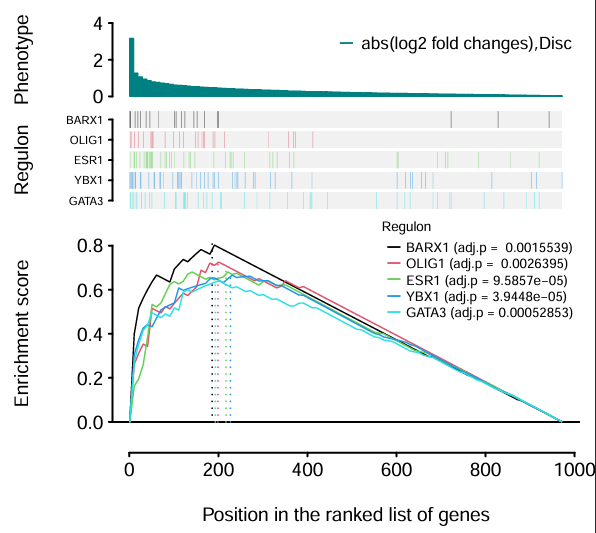

In [ ]:
#Condition 3:

#--8-5.GeneAnnotation----
gene_annot<- read.delim("~/NCA.ER/Gene_annot_MP.TF_Used_EN113.txt",header = TRUE)
rownames(gene_annot) <- gene_annot[,2]
View(gene_annot)
colnames(gene_annot)
colnames(gene_annot)[colnames(gene_annot) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot)[colnames(gene_annot) == "ensembl_gene_id"] <- "ENSEMBL"

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot <- gene_annot %>%
  select(SYMBOL, everything())
View(gene_annot)
#---

gene_annot_common <- intersect(gene_annot$SYMBOL,rownames(phenotype_mp_pos))
View(gene_annot_common)

# Subset gene_annot based on matching SYMBOL column
gene_annot_tna <- gene_annot[gene_annot$SYMBOL %in% gene_annot_common, ]
gene_annot_tna <- gene_annot_tna[order(gene_annot_tna$SYMBOL), ]
View(gene_annot_tna)
dim(gene_annot_tna) #[1] 1413  7

phenotype_mp_pos <- phenotype_mp_pos[gene_annot_common,]
View(phenotype_mp_pos)

# Extract 'logFC' as a named numeric vector
logFC_disc_mp <- setNames(phenotype_mp_pos$logFC, rownames(phenotype_mp_pos))
View(logFC_disc_mp)

all.equal(names(logFC_disc_mp),rownames(phenotype_mp_pos))
all.equal(as.vector(logFC_disc_mp),phenotype_mp_pos$logFC)

tna.disc_lmfit_mp <- list(
  phenotype = logFC_disc_mp,
  phenoID = gene_annot_tna,
  hits = rownames(phenotype_mp_pos)
)

View(tna.disc_lmfit_mp)
save(tna.disc_lmfit_mp, file = "C3.Disc.Linear.phe.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'hits', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype
library(RTN)
load("C:/NCA.ER/Finalyzing/4.MP.TF/Disc.MP.296TF/Disc.rtni.NA.forDEG.RData")
#rtni_disc_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_disc.mp <- tni2tna.preprocess(object = rtni_disc_mp.tf.NA,
                                     phenotype = tna.disc_lmfit_mp$phenotype,
                                     hits = tna.disc_lmfit_mp$hits,
                                     phenoIDs = tna.disc_lmfit_mp$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 82.8% !
#--Extracting regulons...
#-Preprocessing complete!
#
#  Warning message:
#  NOTE: 17.2% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

# Run the MRA method
rtna_disc.mp <- tna.mra(rtna_disc.mp)
#-Performing master regulatory analysis...
#--For 253 regulons...
#|==============================================================================| 100%
#Master regulatory analysis complete

# Get MRA results;
#..setting 'ntop = -1' will return all results, regardless of a threshold
mra_disc.mp <- tna.get(rtna_disc.mp, what="mra", ntop = -1)
View(mra_disc.mp)
write.table(mra_disc.mp_p,file = "DISC.MRA.MP.txt",sep = "\t")


# Run the GSEA method
# Please set nPermutations >= 1000
rtna_disc.mp <- tna.gsea1(rtna_disc.mp, nPermutations=2000)
#-Performing gene set enrichment analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#-Gene set enrichment analysis complete

# Get GSEA results
gsea1_disc.mp <- tna.get(rtna_disc.mp, what="gsea1", ntop = -1)
head(gsea1_disc.mp)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000065978    YBX1           52           0.75 5.3238e-07      5.0044e-05
#ENSG00000091831    ESR1           44           0.75 9.0090e-06      5.6456e-04
#ENSG00000131668   BARX1           21           0.86 5.5120e-05      2.5906e-03
#ENSG00000107485   GATA3           47           0.71 8.7621e-05      3.2946e-03
#ENSG00000173894    CBX2           42           0.70 1.8595e-04      5.8265e-03
#ENSG00000125850   OVOL2           22           0.82 2.6131e-04      6.4116e-03

View(gsea1_disc.mp)
write.table(gsea1_disc.mp_h,file = file.path("~/NCA.ER/66Regulons.NCA/Disc.NCA.66TF.MP/","DISC.gsea1.hits.txt"),sep = "\t",row.names = TRUE, col.names = TRUE)


# Plot GSEA results
tna.plot.gsea1(rtna_disc.mp,
               labPheno="abs(log2 fold changes),Disc",
               ntop = 5,
               file = "disc.gsea1_top5_phenotype",
               ylimPanels = c(0.0,3.5,0.0,2),
               regulon.order = "score"
)


# Run the GSEA-2T method
# Please set nPermutations >= 1000
rtna_disc.mp <- tna.gsea2(rtna_disc.mp, nPermutations = 2000)
#-Performing two-tailed GSEA analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#|==============================================================================| 100%
#GSEA2 analysis complete
View(rtna_disc.mp)

# Get GSEA-2T results
gsea2_disc.mp <- tna.get(rtna_disc.mp, what = "gsea2", ntop = -1)
head(gsea2_disc.mp$differential)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000131668   BARX1           21          -1.87 0.00049975       0.0018422
#ENSG00000119866  BCL11A           43          -1.56 0.00049975       0.0018422
#ENSG00000173894    CBX2           42          -1.68 0.00049975       0.0018422
#ENSG00000172216   CEBPB           24          -1.48 0.00049975       0.0018422
#ENSG00000115163   CENPA           47          -1.58 0.00049975       0.0018422
#ENSG00000276644   DACH1           14           0.87 0.00049975       0.0018422

write.table(gsea2_disc.mp,file = file.path("~/NCA.ER/NCA.METABRIC/Disc.MP.279TF/","DISC.tna.gsea2.mp.all.txt"),sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA-2T results
tna.plot.gsea2(rtna_disc.mp, labPheno="log2 fold changes,Disc", tfs="GATA3", file = "Disc.gsea2_mp_phenotype")
save.image("Disc.Linear.RTNA.RData")

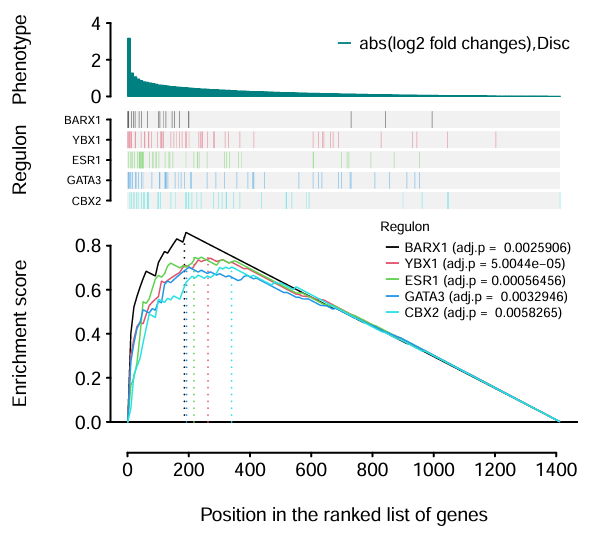

# 8-2.glmfit model for DEG

In [ ]:
#--8-4.2.glmfit Model----
load("C:/NCA.ER/Finalyzing/4.MP.TF/Disc.MP.296TF/Disc.rtni.NA.forDEG.RData")
#Loading required package: RTN

library(edgeR)

# Prepare data for edgeR
group <- factor(sampleAnnotation.disc_tna_mp$ER.Status)
dge <- DGEList(counts = counts.mp.disc, group = group)

# Normalize counts
dge <- calcNormFactors(dge)

# Create the design matrix
design <- model.matrix(~ 0 + group)
colnames(design) <- levels(group)

# Estimate dispersion and fit the model
dge <- estimateDisp(dge, design)
glm.fit <- glmfit(dge, design)

# Compare ER+ (Positive) vs ER- (Negative)
contrast <- makeContrasts(Positive_vs_Negative = Positive - Negative, levels = design)
glm.lrt <- glmLRT(glm.fit, contrast = contrast)

# Extract results (log2 fold changes, p-values, etc.)
phenotype_mp_pos <- topTags(glm.lrt, n = Inf)$table

# Order phenotype alphabetically by row names (if required)
phenotype_mp_pos <- phenotype_mp_pos[order(rownames(phenotype_mp_pos)), ]

# Save results to a file if needed
write.table(phenotype_mp_pos,file = "Disc.glmfit.DEG.MP.txt",sep = "\t")

# Output the top results for inspection
View(phenotype_mp_pos)
dim(phenotype_mp_pos)  #[1] 1420    6

all(rownames(phenotype_mp_pos) == rownames(counts.mp.disc))

#Condition 1 & 2:
# Filter genes with significant adjusted p-value [& abs(logFC) > 1]
hits_disc.mp1 <- subset(phenotype_mp_pos, FDR < 0.05 & abs(logFC) > 1)

# View the differentially expressed genes
View(hits_disc.mp1)
dim(hits_disc.mp1) #[1] 1420   6
#--8-5.GeneAnnotation----
gene_annot<- read.delim("~/NCA.ER/Gene_annot_MP.TF_Used_EN113.txt",header = TRUE)
rownames(gene_annot) <- gene_annot[,2]
View(gene_annot)
colnames(gene_annot)
colnames(gene_annot)[colnames(gene_annot) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot)[colnames(gene_annot) == "ensembl_gene_id"] <- "ENSEMBL"

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot <- gene_annot %>%
  select(SYMBOL, everything())
View(gene_annot)
#---

gene_annot_common <- intersect(gene_annot$SYMBOL,rownames(hits_disc.mp1))
View(gene_annot_common)

# Subset gene_annot based on matching SYMBOL column
gene_annot_tna <- gene_annot[gene_annot$SYMBOL %in% gene_annot_common, ]
gene_annot_tna <- gene_annot_tna[order(gene_annot_tna$SYMBOL), ]
View(gene_annot_tna)
dim(gene_annot_tna) #[1] 1413  7

hits_disc.mp1 <- hits_disc.mp1[gene_annot_common,]
hits_disc.mp1 <- hits_disc.mp1[order(rownames(hits_disc.mp1)),]
View(hits_disc.mp1)

# Extract 'logFC' as a named numeric vector
logFC_disc_mp_h1 <- setNames(hits_disc.mp1$logFC, rownames(hits_disc.mp1))
View(logFC_disc_mp_h1)

all.equal(names(logFC_disc_mp_h1),rownames(hits_disc.mp1))
all.equal(as.vector(logFC_disc_mp_h1),hits_disc.mp1$logFC)

tna.disc_glmfit_h1 <- list(
  phenotype = logFC_disc_mp_h1,
  phenoID = gene_annot_tna,
  hits = rownames(hits_disc.mp1)
)

View(tna.disc_glmfit_h1)
save(tna.disc_glmfit_h1, file = "C1.Disc.glmfit.hits.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'hits', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype

#rtni_disc_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_disc.mp_h1 <- tni2tna.preprocess(object = rtni_disc_mp.tf.NA,
                                     phenotype = tna.disc_glmfit_h1$phenotype,
                                     hits = tna.disc_glmfit_h1$hits,
                                     phenoIDs = tna.disc_glmfit_h1$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 82.8% !
#--Extracting regulons...
#-Preprocessing complete!
#
#  Warning message:
#  NOTE: 17.2% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

# Run the MRA method
rtna_disc.mp_h1 <- tna.mra(rtna_disc.mp_h1)
#-Performing master regulatory analysis...
#--For 253 regulons...
#|==============================================================================| 100%
#Master regulatory analysis complete

# Get MRA results;
#..setting 'ntop = -1' will return all results, regardless of a threshold
mra_disc.mp_h1 <- tna.get(rtna_disc.mp_h1, what="mra", ntop = -1)
View(mra_disc.mp_h1)
write.table(mra_disc.mp_h1,file = "DISC.glmfit.MRA.MP.txt",sep = "\t")


# Run the GSEA method
# Please set nPermutations >= 1000
rtna_disc.mp_h1 <- tna.gsea1(rtna_disc.mp_h1, nPermutations=2000)
#-Performing gene set enrichment analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#-Gene set enrichment analysis complete

# Get GSEA results
gsea1_disc.mp_h1 <- tna.get(rtna_disc.mp_h1, what="gsea1", ntop = -1)
head(gsea1_disc.mp_h1)
# Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000105672    ETV2          110           0.55 5.5276e-10      1.0392e-07
#ENSG00000104885   DOT1L           42           0.66 1.4934e-06      1.4038e-04
#ENSG00000124440   HIF3A           38           0.46 4.9975e-04      3.1318e-03
#ENSG00000069812    HES2           28           0.30 3.9980e-03      1.0022e-02
#ENSG00000184677  ZBTB40           30           0.32 4.4978e-03      1.0982e-02
#ENSG00000164330    EBF1           43           0.22 2.1489e-02      3.8846e-02

View(gsea1_disc.mp_h1)
write.table(gsea1_disc.mp_h1,file = "C1.DISC.gsea1.glmfit.hits.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA results
tna.plot.gsea1(rtna_disc.mp_h1,
               labPheno="abs(log2 fold changes),Disc",
               ntop = 5,
               file = "disc.gsea1_top5_glmfit.hits",
               ylimPanels = c(0.0,3.5,0.0,2),
               regulon.order = "score"
)


# Run the GSEA-2T method
# Please set nPermutations >= 1000
rtna_disc.mp_h1 <- tna.gsea2(rtna_disc.mp_h1, nPermutations = 2000)
#-Performing two-tailed GSEA analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#|==============================================================================| 100%
#GSEA2 analysis complete
View(rtna_disc.mp_h1)
#Warning message:
#  In tna.gsea2(rtna_disc.mp_h1, nPermutations = 2000) :
#  NOTE: it is expected 'phenotype' data as differential expression values (e.g. logFC)!

# Get GSEA-2T results
gsea2_disc.mp_h1 <- tna.get(rtna_disc.mp_h1, what = "gsea2", ntop = -1)
head(gsea2_disc.mp_h1$differential)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000125826   RBCK1           15          -0.46 0.00049975        0.037581
#ENSG00000165512   ZNF22           20          -0.45 0.00049975        0.037581
#ENSG00000119866  BCL11A           43          -0.73 0.00099950        0.037581
#ENSG00000159216   RUNX1           45          -0.82 0.00099950        0.037581
#ENSG00000155592 ZKSCAN2           27          -1.16 0.00099950        0.037581
#ENSG00000131668   BARX1           21          -0.92 0.00149930        0.040266

write.table(gsea2_disc.mp_h1,file = "DISC.gsea2.glmfit.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA-2T results
tna.plot.gsea2(rtna_disc.mp_h1, labPheno="log2 fold changes,Disc", tfs="DOT1L", file = "Disc.gsea2_mp_phenotype")
save.image("Disc.glmfit.RTNA.RData")


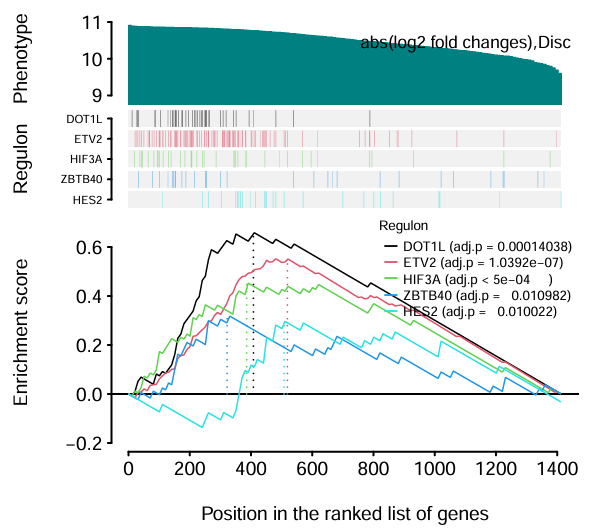

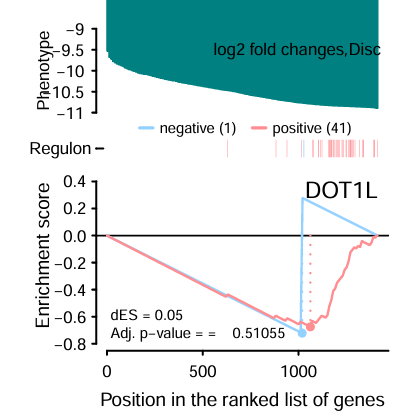

#8-3.glmer model

In [ ]:
#--8-4.3.glmer Model----
# Load the required library
library(lme4)

# Prepare the design matrix for ER status
# Assuming "ER.Status" contains "ERpos" and "ERneg"
sampleAnnotation.disc_tna_mp$ER.Status <- factor(sampleAnnotation.disc_tna_mp$ER.Status, levels = c("Negative", "Positive"))
design_mp_pos <- model.matrix(~ ER.Status, data = sampleAnnotation.disc_tna_mp)

# Add row names to the design matrix
rownames(design_mp_pos) <- rownames(sampleAnnotation.disc_tna_mp)

# Add row names as a column in the sample annotation data frame
sampleAnnotation.disc_tna_mp$Sample <- rownames(sampleAnnotation.disc_tna_mp)

# Reshape the counts matrix to a long format
long_data <- reshape2::melt(counts.mp.disc, varnames = c("Gene", "Sample"), value.name = "Count")

# Merge with sample annotations using the "Sample" column
long_data <- merge(long_data, sampleAnnotation.disc_tna_mp, by = "Sample")


# Fit the mixed-effects model
# Random intercept for "Gene" and fixed effect for "ER.Status"
fit <- glmer(Count ~ ER.Status + (1 | Gene),
             family = poisson(link = "log"),
             data = long_data)
#There were 50 or more warnings (use warnings() to see the first 50)
warnings()
#Warning messages:
#1: In (function (fr, X, reTrms, family, nAGQ = 1L, verbose = 0L,  ... :
#  non-integer x = 6.243935#

#8-4. Voom model
The voom model shows the closest resemblance to the linear model.
No gene with abs(logFC)>1

In [ ]:
#---8-4.Voom model----
# Load required libraries
library(edgeR)
library(limma)


# Step 2: Prepare the DGEList object
dge <- DGEList(counts = counts.mp.disc)
dge <- calcNormFactors(dge)  # Normalize for library size differences

# Step 3: Create the design matrix
# Assuming 'Group' column in sampleAnnotation.disc_tna_mp contains the condition (e.g., Negative, Positive)
design <- model.matrix(~ 0 + sampleAnnotation.disc_tna_mp$ER.Status)
colnames(design) <- levels(factor(sampleAnnotation.disc_tna_mp$ER.Status))  # Name columns with group names
rownames(design) <- rownames(sampleAnnotation.disc_tna_mp)  # Name rows with sample names

# Step 4: Apply the voom transformation
v <- voom(dge, design, plot = TRUE)

# Step 5: Fit a linear model
v.fit <- lmFit(v, design)

# Step 6: Create contrasts (optional, for pairwise comparisons)
# Adjust group names as per your design matrix
contrast.matrix <- makeContrasts(
  Positive_vs_Negative = Positive - Negative,
  levels = design
)
v.fit <- contrasts.fit(v.fit, contrast.matrix)

# Step 7: Apply empirical Bayes moderation
v.fit <- eBayes(v.fit)

# Step 8: Extract top differentially expressed genes
top.table <- topTable(v.fit, coef = "Positive_vs_Negative", number = Inf, sort.by = "P")

# Step 9: Save results to a file
write.table(top.table, "Disc.voom.deg_results.txt", row.names = TRUE)

hits1 <- subset(top.table,adj.P.Val < 0.05)
dim(hits1) #[1] 977   6
hits2 <- subset(top.table,adj.P.Val < 0.05 & abs(logFC) > 1)
dim(hits2) #[1] 0 6

# Optional: Diagnostic plots
# MA plot
plotMA(v.fit, coef = "Positive_vs_Negative", main = "MA Plot")
# Volcano plot
volcano <- with(top.table, {
  plot(logFC, -log10(P.Value), pch = 20, main = "Volcano Plot", xlab = "Log Fold Change", ylab = "-log10(p-value)")
  abline(h = -log10(0.05), col = "red")  # Adjust p-value threshold
})

#--8-5.GeneAnnotation----
gene_annot<- read.delim("~/NCA.ER/Gene_annot_MP.TF_Used_EN113.txt",header = TRUE)
rownames(gene_annot) <- gene_annot[,2]
View(gene_annot)
colnames(gene_annot)
colnames(gene_annot)[colnames(gene_annot) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot)[colnames(gene_annot) == "ensembl_gene_id"] <- "ENSEMBL"

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot <- gene_annot %>%
  select(SYMBOL, everything())
View(gene_annot)
#---

gene_annot_common <- intersect(gene_annot$SYMBOL,rownames(hits1))
View(gene_annot_common)

# Subset gene_annot based on matching SYMBOL column
gene_annot_tna <- gene_annot[gene_annot$SYMBOL %in% gene_annot_common, ]
gene_annot_tna <- gene_annot_tna[order(gene_annot_tna$SYMBOL), ]
View(gene_annot_tna)
dim(gene_annot_tna) #[1] 973  7

hits1 <- hits1[gene_annot_common,]
hits1 <- hits1[order(rownames(hits1)),]
View(hits1)

# Extract 'logFC' as a named numeric vector
logFC_disc_mp_h1 <- setNames(hits1$logFC, rownames(hits1))
View(logFC_disc_mp_h1)

all.equal(names(logFC_disc_mp_h1),rownames(hits1))
all.equal(as.vector(logFC_disc_mp_h1),hits1$logFC)

tna.disc_lmfit_h1 <- list(
  phenotype = logFC_disc_mp_h1,
  phenoID = gene_annot_tna,
  hits = rownames(hits1)
)

View(tna.disc_lmfit_h1)
save(tna.disc_lmfit_h1, file = "C2.Disc.Linear.hits.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'hits', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype
library(RTN)
load("C:/NCA.ER/Finalyzing/4.MP.TF/Disc.MP.296TF/Disc.rtni.NA.forDEG.RData")
#rtni_disc_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_disc.mp_h1 <- tni2tna.preprocess(object = rtni_disc_mp.tf.NA,
                                     phenotype = tna.disc_lmfit_h1$phenotype,
                                     hits = tna.disc_lmfit_h1$hits,
                                     phenoIDs = tna.disc_lmfit_h1$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 57% !
#  --Extracting regulons...
#-Preprocessing complete!
#
#  Warning message:
#  NOTE: 43% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

# Run the MRA method
rtna_disc.mp_h1 <- tna.mra(rtna_disc.mp_h1)
#-Performing master regulatory analysis...
#--For 253 regulons...
#|==============================================================================| 100%
#Master regulatory analysis complete

# Get MRA results;
#..setting 'ntop = -1' will return all results, regardless of a threshold
mra_disc.mp_h1 <- tna.get(rtna_disc.mp_h1, what="mra", ntop = -1)
View(mra_disc.mp_h1)
write.table(mra_disc.mp_h1,file = "DISC.MRA.MP.voom.txt",sep = "\t")


# Run the GSEA method
# Please set nPermutations >= 1000
rtna_disc.mp_h1 <- tna.gsea1(rtna_disc.mp_h1, nPermutations=2000)
#-Performing gene set enrichment analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#-Gene set enrichment analysis complete

# Get GSEA results
gsea1_disc.mp_h1 <- tna.get(rtna_disc.mp_h1, what="gsea1", ntop = -1)
head(gsea1_disc.mp_h1)
# Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000065978    YBX1           52           0.67 1.6902e-06      5.1878e-05
#ENSG00000091831    ESR1           44           0.70 1.9316e-06      5.1878e-05
#ENSG00000107485   GATA3           47           0.63 6.1290e-05      1.4403e-03
#ENSG00000119866  BCL11A           41           0.63 1.3835e-04      2.8901e-03
#ENSG00000131668   BARX1           21           0.82 1.5885e-04      2.9864e-03
#ENSG00000173894    CBX2           41           0.62 3.6312e-04      6.2060e-03

View(gsea1_disc.mp_h1)
write.table(gsea1_disc.mp_h1,file = "DISC.gsea1.hits.voom.txt",sep = "\t",row.names = TRUE, col.names = TRUE)


# Plot GSEA results
tna.plot.gsea1(rtna_disc.mp_h1,
               labPheno="abs(log2 fold changes),Disc",
               ntop = 5,
               file = "disc.gsea1_top5_hits_voom",
               ylimPanels = c(0.0,3.5,0.0,2),
               regulon.order = "score"
)


# Run the GSEA-2T method
# Please set nPermutations >= 1000
rtna_disc.mp_h1 <- tna.gsea2(rtna_disc.mp_h1, nPermutations = 2000)
#-Performing two-tailed GSEA analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#|==============================================================================| 100%
#GSEA2 analysis complete
View(rtna_disc.mp_h1)

# Get GSEA-2T results
gsea2_disc.mp_h1 <- tna.get(rtna_disc.mp_h1, what = "gsea2", ntop = -1)
head(gsea2_disc.mp_h1$differential)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000131668   BARX1           21          -1.81 0.00049975       0.0020425
#ENSG00000119866  BCL11A           41          -1.50 0.00049975       0.0020425
#ENSG00000173894    CBX2           41          -1.57 0.00049975       0.0020425
#ENSG00000115163   CENPA           45          -1.47 0.00049975       0.0020425
#ENSG00000276644   DACH1           13           0.83 0.00049975       0.0020425
#ENSG00000007968    E2F2           37          -1.36 0.00049975       0.0020425

write.table(gsea2_disc.mp_h1,file = "DISC.tna.gsea2.mp.voom.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA-2T results
tna.plot.gsea2(rtna_disc.mp_h1, labPheno="log2 fold changes,Disc", tfs="GATA3", file = "Disc.gsea2_mp_voom")
save.image("Disc.voom.RTNA.RData")


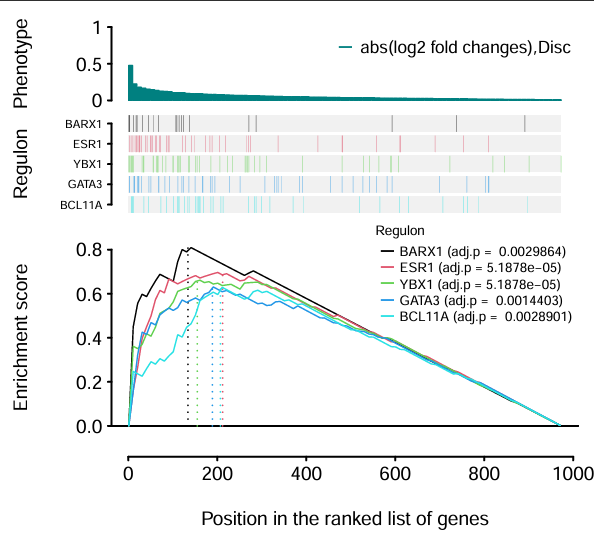

#9.VALIDATION
ALTOGETHER IN ONE CODE CELL

In [ ]:
#1.Regulon of all genes
#R File from "C:/NCA.ER/Finalyzing/2.All.Genes/valid.all.genes/"
setwd("C:/NCA.ER/Finalyzing/2.All.Genes/Valid.all.genes/")
#---Load libraries-----------------
library(RTN)
#---1.Load Gene Expression Data of 90 metabolic pathways and TFs = a mtrix for counts/assays---------------------------------
#load txt. Format for available genes in the Validovery dataset
Valid.ALL <- read.delim("~/NCA.ER/data/VALID.Genes.txt",header = TRUE, as.is = TRUE)

sum(is.na(Valid.ALL[, 1]))  # Count the number of NA values
#[1] 1

which(is.na(Valid.ALL[, 1]))  # Identify their positions
#[1] 11028 in the main file not sorted, only metabolic clusters row was removed.
# [1] 10390 in the sorted data based on gene names without 1 and 0 metabolic clusters.

Valid.ALL <- Valid.ALL[-10390,]  # Remove the row with 'NA' as gene name
rownames(Valid.ALL) <- Valid.ALL[,1]
Valid.ALL <- Valid.ALL[,-1]
dim(Valid.ALL)
#[1] 19219  994

str(Valid.ALL)
#'data.frame':	19219 obs. of  994 variables:
#$ MB.0000: num  5.25 9.84 5.34 6.65 5.66 ...
#$ MB.0002: num  5.4 8.32 5.36 6.64 5.32 ...
#$ MB.0010: num  5.46 8.96 5.55 5.66 5.34 ...
#$ MB.0025: num  5.6 10.04 5.18 5.63 5.41 ...
#$ MB.0035: num  5.52 8.8 5.05 5.49 5.16 ...

View(Valid.ALL)

colnames(Valid.ALL) <- gsub("\\.", "_", colnames(Valid.ALL))

#Sort data by columnnames(Sample IDs) and rownames(Gene IDs)
Valid.ALL <- Valid.ALL[order(rownames(Valid.ALL)),order(colnames(Valid.ALL))]
View(Valid.ALL)
head(Valid.ALL)
str(Valid.ALL)
#'data.frame':	19219 obs. of  994 variables:
#$ MB_0000: num  5.25 9.84 5.34 6.65 5.66 ...
#$ MB_0002: num  5.4 8.32 5.36 6.64 5.32 ...
#$ MB_0010: num  5.46 8.96 5.55 5.66 5.34 ...
#$ MB_0025: num  5.6 10.04 5.18 5.63 5.41 ...
#$ MB_0035: num  5.52 8.8 5.05 5.49 5.16 ...

#check for NAs
sum(is.na(Valid.ALL))
#[1] 4

which(is.na((rownames(Valid.ALL))))
#integer(0)

#check for non-numeric elements
counts.Valid.all <- as.matrix(Valid.ALL)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements1 <- counts.Valid.all[is.na(as.numeric(counts.Valid.all))]

length(non_numeric_elements1)
#[1] 4

print(non_numeric_elements1)
#[1] NA NA NA NA

# Check the structure of the matrix after conversion
str(counts.Valid.all)
#num [1:19219, 1:994] 5.25 9.84 5.34 6.65 5.66 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:19219] "A1CF" "A2M" "A2ML1" "A4GALT" ...
#..$ : chr [1:994] "MB_0000" "MB_0002" "MB_0010" "MB_0025" ...

counts.Valid.all <- t(apply(counts.Valid.all, 1, function(row) {
  # Replace NA in the row with the mean of non-NA values in that row
  row[is.na(row)] <- mean(row, na.rm = TRUE)
  return(row)
}))

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements2 <- counts.Valid.all[is.na(as.numeric(counts.Valid.all))]

length(non_numeric_elements2)
#[1] 0

print(non_numeric_elements2)
#numeric(0)

View(counts.Valid.all)

write.table(counts.Valid.all,file = "Valid.Genes.Curated.txt",sep = "\t")

#---Above from section 1.Curating Data; repeated for validation data set---
#---2.Sample Annotation Data---------------------------------
Metabric_Manual_valid <- read.delim("~/NCA.ER/data/METABRIC Clinical.txt", row.names = 1)
View(Metabric_Manual_valid)

Metabric_Manual_valid <- Metabric_Manual_valid[order(rownames(Metabric_Manual_valid)),]
View(Metabric_Manual_valid)

# Replace dots with underscores in column names if needed
rownames(Metabric_Manual_valid) <- gsub("\\-", "_", rownames(Metabric_Manual_valid))
View(Metabric_Manual_valid)

# Load required library
library(dplyr)

# Assuming your dataset is named Metabric_Manual_valid
# Create a new binary dataframe based on transformations
Metabric_Manual_valid <- Metabric_Manual_valid %>%
  transmute(
    IDs = rownames(Metabric_Manual_valid),
    Cohort = Cohort,

    OS.time = Overall.Survival..Months.,
    OS.event = ifelse(Overall.Survival.Status == "1:DECEASED", 1, 0),
    DSS.event = ifelse(Patient.s.Vital.Status == "Died of Disease", 1, 0),
    RFS.event = ifelse(Relapse.Free.Status == "1:Recurred", 1, 0),
    RFS.time = Relapse.Free.Status..Months.,

    Grade = Neoplasm.Histologic.Grade,
    Size = Tumor.Size,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,


    # Subtypes for LumA, LumB, Basal, Her2, Normal based on Pam50 subtype
    LumA = ifelse(Pam50...Claudin.low.subtype == "LumA", 1, 0),
    LumB = ifelse(Pam50...Claudin.low.subtype == "LumB", 1, 0),
    Basal = ifelse(Pam50...Claudin.low.subtype == "Basal", 1, 0),
    Her2 = ifelse(Pam50...Claudin.low.subtype == "Her2", 1, 0),
    Normal = ifelse(Pam50...Claudin.low.subtype == "Normal", 1, 0),

    # ER and PR status (positive and negative)
    `ER+` = ifelse(ER.Status == "Positive", 1, 0),
    `ER-` = ifelse(ER.Status == "Negative", 1, 0),


    # Histologic Grade categories G1, G2, G3
    G1 = ifelse(Neoplasm.Histologic.Grade == 1, 1, 0),
    G2 = ifelse(Neoplasm.Histologic.Grade == 2, 1, 0),
    G3 = ifelse(Neoplasm.Histologic.Grade == 3, 1, 0),

    # Hormone Therapy (HT)
    HT = ifelse(Hormone.Therapy == "YES", 1, 0),

  )
View(Metabric_Manual_valid)

# Print head of the colAnnotation for verification
head(Metabric_Manual_valid)

#---Converting Metabric Clinical data into Sample Annotation---
valid_sample_all_ids <- colnames(counts.Valid.all)
View(valid_sample_all_ids)
length(valid_sample_all_ids)
#[1] 994
sort(valid_sample_all_ids)
View(valid_sample_all_ids)
length(valid_sample_all_ids)
#[1] 994

all.equal(valid_sample_all_ids,colnames(counts.Valid.all))
#[1] TRUE

# Find the common sample IDs between the two datasets
common_samples_valid <- intersect(rownames(Metabric_Manual_valid), valid_sample_all_ids)
common_samples_valid <- sort(common_samples_valid)
View(common_samples_valid)
length(common_samples_valid)
#[1] 992

# Subset and reorder both datasets to only include common samples
counts.Valid.all <- counts.Valid.all[, common_samples_valid]
all.equal(colnames(counts.Valid.all), common_samples_valid)
#[1] TRUE
View(counts.Valid.all)
dim(counts.Valid.all)
#[1] 19219  988

sampleAnnotation.valid <- Metabric_Manual_valid[common_samples_valid, ]
dim(sampleAnnotation.valid)
#[1] 992   22

# Verify that they are aligned
all.equal(colnames(counts.Valid.all), rownames(sampleAnnotation.valid))  # Should return TRUE
#[1] TRUE

# If the first is not TRUE, you can match up the samples/columns in
# counts with the samples/rows in sampleAnnotation.valid like this (which is fine
# to run even if the first was TRUE):

#tempindex <- match(colnames(counts.Valid.all), rownames(sample_metadata))
#sampleAnnotation.valid <- sample_metadata[tempindex, ]

#Check again

#all.equal(colnames(counts.Valid.all), rownames(sampleAnnotation.valid))

#--- 3. Gene Annotation Data----
#Duplicates Removed Manually
valid.Gene.Annot.Curated <- read.delim("~/NCA.ER/Gene_Annot_All_Used_ENS113.txt")
table(duplicated(valid.Gene.Annot.Curated$external_gene_name))
#FALSE
#18515

dim(valid.Gene.Annot.Curated)
#[1] 18515     7
length(valid.Gene.Annot.Curated)
View(valid.Gene.Annot.Curated)
dim(counts.Valid.all)
#[1] 19219  988

#Only Validated IDs Taken
# Extract gene IDs from both datasets
ensemble_ids <- valid.Gene.Annot.Curated$external_gene_name
View(ensemble_ids)
ensemble_ids <- sort(ensemble_ids)
length(ensemble_ids) #[1] 18515

valid_all_gene_ids <- rownames(counts.Valid.all )
View(valid_all_gene_ids)

common_genes <- intersect(valid.Gene.Annot.Curated$external_gene_name, valid_all_gene_ids) # Should match or be close to 1420
common_genes <- sort(common_genes)
all.equal(ensemble_ids, common_genes) #[1] TRUE
length(common_genes)
#[1] 18515

# Subset and reorder both datasets to only include common samples
counts.Valid.all <- counts.Valid.all[common_genes, ]
View(counts.Valid.all)

all.equal(ensemble_ids,rownames(counts.Valid.all))
all.equal(common_genes,rownames(counts.Valid.all))


#Set rownames for gene annotation, %n% doesn't let your data go NA
valid.Gene.Annot.Curated <- valid.Gene.Annot.Curated[valid.Gene.Annot.Curated$external_gene_name %in% common_genes, ]
rownames(valid.Gene.Annot.Curated) <- valid.Gene.Annot.Curated$external_gene_name
valid.Gene.Annot.Curated <- valid.Gene.Annot.Curated[order(rownames(valid.Gene.Annot.Curated)),]
View(valid.Gene.Annot.Curated)
all.equal(valid.Gene.Annot.Curated$external_gene_name, rownames(counts.Valid.all))
all.equal(valid.Gene.Annot.Curated$external_gene_name,rownames(valid.Gene.Annot.Curated))
all.equal(valid.Gene.Annot.Curated$external_gene_name,common_genes)
all.equal(common_genes,ensemble_ids)

#Sort counts.Valid.all and gene_annot_all_valid based on rownames which is gene names
counts.Valid.all <- counts.Valid.all[order(rownames(counts.Valid.all)), ]
valid.Gene.Annot.Curated <- valid.Gene.Annot.Curated[order(rownames(valid.Gene.Annot.Curated)), ]

all.equal(rownames(counts.Valid.all), rownames(valid.Gene.Annot.Curated))  #[1] TRUE
dim(counts.Valid.all) #[1] 18515   992
dim(valid.Gene.Annot.Curated) #[1] 18515     7
View(valid.Gene.Annot.Curated)

#In rtni analysis it needs "SYMBOL" in rowAnnotation
colnames(valid.Gene.Annot.Curated)
colnames(valid.Gene.Annot.Curated)[colnames(valid.Gene.Annot.Curated) == "external_gene_name"] <- "SYMBOL"
colnames(valid.Gene.Annot.Curated)[colnames(valid.Gene.Annot.Curated) == "ensembl_gene_id"] <- "ENSEMBL"

# Verify the change
colnames(valid.Gene.Annot.Curated)


# One final check:
stopifnot(rownames(valid.Gene.Annot.Curated) == rownames(counts.Valid.all), # features
          rownames(sampleAnnotation.valid) == colnames(counts.Valid.all)) # samples

save(list = ls(), file = "1.Data before List.RData")

#---4. Prepare for rtni---
valid_all <- list(
  expData = counts.Valid.all,                       # expData as an assay
  rowAnnotation = valid.Gene.Annot.Curated,             # Gene annotations (row metadata)
  colAnnotation = sampleAnnotation.valid           # Sample annotations (column metadata)
)

View(valid_all)

#---Load RegulatoryElements---
# Load TF annotation
data("tfsData")

# Check TF annotation:
# Intersect TFs from Lambert et al. (2018) with gene annotation
# from the gene expression of 90 metabolic pathway cohort
regulatoryElements <- intersect(tfsData$Lambert2018$SYMBOL, valid_all$rowAnnotation$SYMBOL)
View(regulatoryElements)
regulatoryElements <- sort(regulatoryElements)
View(regulatoryElements)

#---constructing rtni---
#This dataset consists of a list with 3 objects:
##a named gene expression matrix (tniData$expData),
##a data frame with gene annotations (tniData$rowAnnotation),
##and a data frame with sample annotations (tniData$colAnnotation).
##alternatively, 'expData' can be a 'SummarizedExperiment' object
rtni_valid_all <- tni.constructor(expData = valid_all$expData,
                                   regulatoryElements = regulatoryElements,
                                   rowAnnotation = valid_all$rowAnnotation,
                                   colAnnotation = valid_all$colAnnotation)

#-Preprocessing for input data...
#--Mapping 'expData' to 'rowAnnotation'...
#--Mapping 'expData' to 'colAnnotation'...
#--Checking 'regulatoryElements' in 'rowAnnotation'...
#-Checking 'expData'...
#-Preprocessing complete!

save(rtni_valid_all, file = "2.rtni_valid_all.constructed.RData")
save.image("2.valid.Before.Run.RData")
#--- 4. Check Normal Distribution-----
hist(counts.Valid.all, breaks = 30, main = "Histogram of Data", xlab = "Values")

save(list = ls(), file = "3.rtni_hist_before_permutation.RData")
#---5.Building Regulons-----
rtni_valid_all <- tni.permutation(rtni_valid_all,
                                 nPermutations = 2000,
                                 estimator = "spearman",
                                 verbose = TRUE)
#-Performing permutation analysis...
#--For 1508 regulons...
#|=================================================================================================| 100%
#-Permutation analysis complete!
save(rtni_valid_all,file = "5.rtni_valid_all.RData")

#Unstable interactions are subsequently removed by bootstrap analysis,
##creates a consensus bootstrap network, referred here as refnet (reference network).
rtni_valid_all <- tni.bootstrap(rtni_valid_all)
#-Performing bootstrap analysis...
#--For 1508 regulons...
#|=================================================================================================| 100%
#-Bootstrap analysis complete!

# Compute the DPI-filtered regulatory network
rtni_valid_all.NA <- tni.dpi.filter(rtni_valid_all, eps = NA)
#-Applying dpi filter...
#-DPI filter complete!
tni.regulon.summary(rtni_valid_all.NA)
#Regulatory network comprised of 1508 regulons.
#-- DPI-filtered network:
#  regulatoryElements            Targets              Edges
#1508              17492             132759
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#0      33      68      88     116     801
#-- Reference network:
#  regulatoryElements            Targets              Edges
#1508              17492            4394463
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#0     833    2766    2914    4856    8145
#---

tni.regulon.summary(rtni_valid_all.NA, regulatoryElements = "GATA3")
#The GATA3 regulon has 370 targets, it's a large and unbalanced regulon.
#-- DPI filtered network targets:
#  Total Positive Negative
#370       47      323
#-- Reference network targets:
#  Total Positive Negative
#7538     3651     3887
#-- Regulators with mutual information:
#  AKAP8, AKAP8L, AKNA, AR, ARID2, ARID5B, ARNT2, ASCL1, ASCL2, ATF3...[556 more]
#
#---
save(list = ls(), file = "6.rtni_valid_all.NA.RData")

regulon.NA <- tni.get(rtni_valid_all.NA, what = 'regulons.and.mode', idkey = "SYMBOL")
View(regulon.NA)
head(regulon.NA)

save(regulon.NA,file = "valid.All.Genes.Regulon.NA.RData")
save(list = ls(), file = "7.rtni_valid_all.NA.Regulon.RData")
#---Extract Regulons----
# Find the maximum number of genes across all regulons
max_genes <- max(sapply(regulon.NA, function(x) if (is.null(x)) 0 else length(x)))

# Create a list of data frames with equal row lengths
regulon_list <- lapply(names(regulon.NA), function(regulon_name) {
  regulon_data <- regulon.NA[[regulon_name]]

  # Handle empty or NULL regulons
  if (is.null(regulon_data) || length(regulon_data) == 0) {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  } else if (is.vector(regulon_data)) {
    # Ensure matching lengths for Gene and Value
    genes <- names(regulon_data)
    values <- regulon_data
    if (length(genes) == 0) genes <- rep(NA, length(values))
    df <- data.frame(
      Gene = genes,
      Value = values,
      stringsAsFactors = FALSE
    )
  } else if (is.matrix(regulon_data) || is.data.frame(regulon_data)) {
    df <- data.frame(
      Gene = rownames(regulon_data),
      Value = regulon_data[, 1], # Assuming values are in the first column
      stringsAsFactors = FALSE
    )
  } else {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  }

  # Extend to max_genes rows if needed
  if (nrow(df) < max_genes) {
    df <- rbind(df, data.frame(
      Gene = rep(NA, max_genes - nrow(df)),
      Value = rep(NA, max_genes - nrow(df))
    ))
  }

  # Rename columns with regulon names
  colnames(df) <- c(paste0(regulon_name, "_Gene"), paste0(regulon_name, "_Value"))
  return(df)
})

# Combine all into one data frame
regulon_df <- do.call(cbind, regulon_list)

# Write to file
write.table(regulon_df, file = ("valid.All.regulon.NA.txt"), sep = "\t", row.names = FALSE, quote = FALSE)
valid.sess <- sessionInfo()
save.image("8.valid.All.Genes.Regulon.NA.RData")

#2.EnrichmentScore
# Load necessary libraries
library(stats)

# Load data
load("C:/NCA.ER/Finalyzing/2.All.Genes/Valid.all.genes/valid.All.Genes.Regulon.NA.RData")
pathway <- read.delim("~/NCA.ER/data/Pathway_Counts_PathwaySheet.txt", header = TRUE)

# Inspect data structure
str(regulon.NA)
#List of 1508
#$ ADNP     : Named num [1:110] 0.1625 -0.0765 -0.0769 0.0576 -0.0707 ...
#..- attr(*, "names")= chr [1:110] "AASDHPPT" "ABHD17A" "ADCY4" "ADNP2" ...
#$ ADNP2    : Named num [1:51] 0.0576 0.0593 -0.0773 -0.0622 -0.0708 ...
#..- attr(*, "names")= chr [1:51] "ADNP" "ARID2" "CAPN3" "CDC42BPB" ...
#$ AEBP1    : Named num [1:218] 0.0249 0.1199 0.1389 0.1069 0.1437 ...

str(pathway)
#'data.frame':	1932 obs. of  2 variables:
#$ Metabolic_Pathways: chr  "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" ...
#$ Genes             : chr  "GPT" "GPT2" "ACY3" "AGXT" ...

# Extract the list of genes from the metabolic pathway
metabolic_pathway_genes <- pathway$Genes

# Compare genes in regulons with metabolic pathway genes
LH <- lapply(regulon.NA, function(regulon) {
  intersect(names(regulon), metabolic_pathway_genes)
})

# Count how many target genes from each regulon are in the metabolic pathway list
LH_counts <- sapply(LH, length)

# Filter out regulons with matches
LH_filtered <- LH[LH_counts > 0]

# Calculate LH ratios with additional details
LH_ratio <- sapply(names(LH_filtered), function(regulon) {
  num_LH <- length(LH_filtered[[regulon]])  # Number of LH genes
  total_genes <- length(names(regulon.NA[[regulon]]))  # LT in the regulon
  ratio <- num_LH / total_genes  # Calculate ratio

  # Return details as a list
  return(c(Regulon = regulon,
           LH = num_LH,
           Total_Genes = total_genes,
           Ratio = ratio))
})

# Convert ratios to a data frame
ratio_df <- as.data.frame(t(LH_ratio), stringsAsFactors = FALSE)
ratio_df$LH <- as.numeric(ratio_df$LH)
ratio_df$Total_Genes <- as.numeric(ratio_df$Total_Genes)
ratio_df$Ratio <- as.numeric(ratio_df$Ratio)

# Define global variables
PH <- 1420  # Total number of recon metabolic genes (Population Hits)
PT <- 30000 # Total number of genes in human genome (Population Total)

# Initialize a list to store contingency tables
contingency_tables <- list()

# Perform Fisher's exact test and save contingency tables
fisher_p_values <- sapply(names(LH_filtered), function(regulon) {
  num_LH <- length(LH_filtered[[regulon]])  # Number of LH genes (Hits)
  total_genes <- length(names(regulon.NA[[regulon]]))  # LT in the regulon (Total Genes)
  num_not_LH <- total_genes - num_LH  # Not hits in regulon
  num_in_metabolic <- PH - num_LH  # Remaining metabolic genes not in regulon
  num_outside_all <- PT - total_genes - num_in_metabolic  # Remaining genes not in regulon or metabolic pathways

  # Construct contingency table
  contingency_table <- matrix(c(
    num_LH, num_in_metabolic,         # In Metabolic Pathways
    num_not_LH, num_outside_all       # Not In Metabolic Pathways
  ), nrow = 2, byrow = TRUE,
  dimnames = list(c("In_Metabolic_Pathways", "Not_In_Metabolic_Pathways"),
                  c("In_Regulon", "Not_In_Regulon")))

  # Save the contingency table for later inspection
  contingency_tables[[regulon]] <<- contingency_table

  # Perform Fisher's exact test
  fisher_result <- fisher.test(contingency_table, alternative = "greater")
  return(fisher_result$p.value)
})

# Adjust p-values using Benjamini-Hochberg correction
fisher_adjusted_p_values <- p.adjust(fisher_p_values, method = "BH")

# Consolidate all results into a data frame
fisher_result_df <- data.frame(
  Regulon = names(LH_filtered),
  LH = sapply(LH_filtered, length),
  Total_Genes = sapply(names(LH_filtered), function(regulon) length(names(regulon.NA[[regulon]]))),
  Ratio = sapply(names(LH_filtered), function(regulon) {
    num_LH <- length(LH_filtered[[regulon]])
    total_genes <- length(names(regulon.NA[[regulon]]))
    return(num_LH / total_genes)
  }),
  Fisher_P_Value = fisher_p_values,
  Fisher_FDR = fisher_adjusted_p_values,
  stringsAsFactors = FALSE
)

# Sort by FDR for better interpretation
fisher_result_df <- fisher_result_df[order(fisher_result_df$Fisher_FDR), ]

# Save results to files
write.table(fisher_result_df, "Valid.regulon_fisher_enrichment_results.txt", sep = "\t", row.names = FALSE)
save(contingency_tables, file = "contingency_tables.RData")

# View a specific table, e.g., for "ADNP"
contingency_tables[["ADNP"]]
write.table(contingency_tables,file = "Valid.contingency.txt",sep = "\t")

valid.session.info <- sessionInfo()
sessionInfo()
#R version 4.4.1 (2024-06-14 ucrt)
#Platform: x86_64-w64-mingw32/x64
#Running under: Windows 11 x64 (build 26100)

#Matrix products: default


#locale:
#  [1] LC_COLLATE=English_United Arab Emirates.utf8
#[2] LC_CTYPE=English_United Arab Emirates.utf8
#[3] LC_MONETARY=English_United Arab Emirates.utf8
#[4] LC_NUMERIC=C
#[5] LC_TIME=English_United Arab Emirates.utf8

#time zone: Asia/Dubai
#tzcode source: internal

#attached base packages:
#  [1] stats     graphics  grDevices utils     datasets  methods   base

#other attached packages:
#  [1] RTN_2.28.0

#loaded via a namespace (and not attached):
#[1] SummarizedExperiment_1.34.0 gtable_0.3.6
#[3] ggplot2_3.5.1               htmlwidgets_1.6.4
#[5] Biobase_2.64.0              lattice_0.22-6
#[7] vctrs_0.6.5                 tools_4.4.1
#[9] generics_0.1.3              stats4_4.4.1
#[11] parallel_4.4.1              tibble_3.2.1
#[13] proxy_0.4-27                pkgconfig_2.0.3
#[15] pheatmap_1.0.12             Matrix_1.7-1
#[17] KernSmooth_2.23-24          data.table_1.16.2
#[19] RColorBrewer_1.1-3          S4Vectors_0.42.1
#[21] lifecycle_1.0.4             GenomeInfoDbData_1.2.12
#[23] compiler_4.4.1              viper_1.38.0
#[25] mixtools_2.0.0              statmod_1.5.0
#[27] munsell_0.5.1               carData_3.0-5
#[29] GenomeInfoDb_1.40.1         snow_0.4-4
#[31] htmltools_0.5.8.1           class_7.3-22
#[33] lazyeval_0.2.2              Formula_1.2-5
#[35] plotly_4.10.4               car_3.1-3
#[37] pillar_1.10.0               crayon_1.5.3
#[39] tidyr_1.3.1                 MASS_7.3-61
#[41] DelayedArray_0.30.1         limma_3.60.6
#[43] RedeR_3.0.0                 abind_1.4-8
#[45] nlme_3.1-166                tidyselect_1.2.1
#[47] digest_0.6.37               dplyr_1.1.4
#[49] kernlab_0.9-33              purrr_1.0.2
#[51] splines_4.4.1               fastmap_1.2.0
#[53] grid_4.4.1                  SparseArray_1.4.8
#[55] colorspace_2.1-1            cli_3.6.3
#[57] magrittr_2.0.3              S4Arrays_1.4.1
#[59] survival_3.8-3              e1071_1.7-16
#[61] scales_1.3.0                UCSC.utils_1.0.0
#[63] minet_3.62.0                segmented_2.1-3
#[65] XVector_0.44.0              httr_1.4.7
#[67] matrixStats_1.4.1           igraph_2.1.2
#[69] pwr_1.3-0                   GenomicRanges_1.56.2
#[71] IRanges_2.38.1              viridisLite_0.4.2
#[73] rlang_1.1.4                 glue_1.8.0
#[75] BiocGenerics_0.50.0         rstudioapi_0.17.1
#[77] jsonlite_1.8.9              R6_2.5.1
#[79] MatrixGenerics_1.16.0       zlibbioc_1.50.0
save(list = ls(),file = "1,2.Valid.EnrichmentScore.RData")
save.image(file = "1,2.Valid.TF.chooseing.RData")

#3.

In [ ]:
#R File from valid.NCA.MP.296tf was taken and renamed
#No need to biomart because the same gene annotation is used
#---Load libraries-----------------
library(RTN)
#---1.Load Gene Expression Data of 90 metabolic pathways and TFs = a mtrix for counts/assays---------------------------------
#load gene expression txt. Format
valid.mp.tf <- read.delim("C:/NCA.ER/Finalyzing/data/Valid.MP.332tf.txt",header = TRUE,row.names = 1)
valid.mp.tf <- valid.mp.tf[order(rownames(valid.mp.tf)),order(colnames(valid.mp.tf))]
colnames(valid.mp.tf) <- gsub("\\.", "_", colnames(valid.mp.tf))
counts.valid.mp.tf <- as.matrix(valid.mp.tf)

str(counts.valid.mp.tf)
#num [1:1749, 1:994] 6.65 5.66 7.64 5.63 6.19 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:1749] "A4GALT" "A4GNT" "AACS" "AADAC" ...
#..$ : chr [1:994] "MB_0000" "MB_0002" "MB_0010" "MB_0025" ...

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements <- counts.valid.mp.tf[is.na(as.numeric(counts.valid.mp.tf))]

length(non_numeric_elements)
#[1] 0

# Display non-numeric elements to understand what they are
print(non_numeric_elements)
#numeric(0)

#---2.Available METABRIC Clinical File as sampleAnnotation.valid =colData----------------------
METABRIC_Manual_valid <- read.delim("~/NCA.ER/data/METABRIC Clinical.txt", row.names = 1)
METABRIC_Manual_valid <- METABRIC_Manual_valid[order(rownames(METABRIC_Manual_valid)),]
View(METABRIC_Manual_valid)

# Replace dots with underscores in column names if needed
rownames(METABRIC_Manual_valid) <- gsub("\\-", "_", rownames(METABRIC_Manual_valid))
View(METABRIC_Manual_valid)

#---3.valid_sample_mp.tf_ids Sample/Column Annotation-----------------------------
# Load required library
library(dplyr)

# Assuming your dataset is named METABRIC_Manual_valid
# Create a new binary dataframe based on transformations
METABRIC_Manual_valid_binary <- METABRIC_Manual_valid %>%
  transmute(
    IDs = rownames(METABRIC_Manual_valid),
    Cohort = Cohort,

    OS.time = Overall.Survival..Months.,
    OS.event = ifelse(Overall.Survival.Status == "1:DECEASED", 1, 0),
    DSS.event = ifelse(Patient.s.Vital.Status == "Died of Disease", 1, 0),
    RFS.event = ifelse(Relapse.Free.Status == "1:Recurred", 1, 0),
    RFS.time = Relapse.Free.Status..Months.,

    Grade = Neoplasm.Histologic.Grade,
    Size = Tumor.Size,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,


    # Subtypes for LumA, LumB, Basal, Her2, Normal based on Pam50 subtype
    LumA = ifelse(Pam50...Claudin.low.subtype == "LumA", 1, 0),
    LumB = ifelse(Pam50...Claudin.low.subtype == "LumB", 1, 0),
    Basal = ifelse(Pam50...Claudin.low.subtype == "Basal", 1, 0),
    Her2 = ifelse(Pam50...Claudin.low.subtype == "Her2", 1, 0),
    Normal = ifelse(Pam50...Claudin.low.subtype == "Normal", 1, 0),

    # ER and PR status (positive and negative)
    `ER+` = ifelse(ER.Status == "Positive", 1, 0),
    `ER-` = ifelse(ER.Status == "Negative", 1, 0),


    # Histologic Grade categories G1, G2, G3
    G1 = ifelse(Neoplasm.Histologic.Grade == 1, 1, 0),
    G2 = ifelse(Neoplasm.Histologic.Grade == 2, 1, 0),
    G3 = ifelse(Neoplasm.Histologic.Grade == 3, 1, 0),

    # Hormone Therapy (HT)
    HT = ifelse(Hormone.Therapy == "YES", 1, 0),

  )

View(METABRIC_Manual_valid_binary)

# Print head of the colAnnotation for verification
head(METABRIC_Manual_valid_binary)

valid_sample_mp.tf_ids <- colnames(valid.mp.tf)
View(valid_sample_mp.tf_ids)
length(valid_sample_mp.tf_ids) #[1] 994

sort(valid_sample_mp.tf_ids)
View(valid_sample_mp.tf_ids)
length(valid_sample_mp.tf_ids)

all.equal(valid_sample_mp.tf_ids,colnames(counts.valid.mp.tf))

# Find the common sample IDs between the two datasets
common_samples_valid <- intersect(rownames(METABRIC_Manual_valid), valid_sample_mp.tf_ids)
common_samples_valid <- sort(common_samples_valid)
View(common_samples_valid)
length(common_samples_valid) #[1] 992

# Subset and reorder both datasets to only include common samples
counts.valid.mp.tf <- counts.valid.mp.tf[, common_samples_valid]
all.equal(rownames(counts.valid.mp.tf), rownames(counts.valid.mp.tf)) #[1] TRUE
View(counts.valid.mp.tf)
dim(counts.valid.mp.tf)  #[1] 1749  992

sampleAnnotation.valid <- METABRIC_Manual_valid_binary[common_samples_valid, ]
dim(sampleAnnotation.valid) #[1] 992  22

# Verify that they are aligned
all.equal(colnames(counts.valid.mp.tf), rownames(sampleAnnotation.valid))  # [1] TRUE

# If the first is not TRUE, you can match up the samples/columns in
# counts with the samples/rows in sampleAnnotation.valid like this (which is fine
# to run even if the first was TRUE):

#tempindex <- match(colnames(counts.valid.mp.tf), rownames(sample_metadata))
#sampleAnnotation.valid <- sample_metadata[tempindex, ]

#Check again

all.equal(colnames(counts.valid.mp.tf), rownames(sampleAnnotation.valid)) #[1] TRUE

print("Step 3 completed: validation SampleAnnotation Prepared")

#---4.Load Ensemble Gene Annotation----------------------------------------------
#Duplicates Removed Manually
gene_annot_mp.tf_valid <- read.delim("~/NCA.ER/Gene_annot_MP.TF_Used_EN113.txt")

dim(gene_annot_mp.tf_valid) #[1] 2912    7
length(gene_annot_mp.tf_valid) #[1] 7
View(gene_annot_mp.tf_valid)
dim(counts.valid.mp.tf) #[1] 1749  992

#Only Validated IDs Taken

# Extract gene IDs from both datasets
ensemble_ids <- gene_annot_mp.tf_valid$external_gene_name
View(ensemble_ids)

ensemble_ids <- sort(ensemble_ids)
length(ensemble_ids) #[1] 2912

valid_mp.tf_gene_ids <- rownames(counts.valid.mp.tf)
View(valid_mp.tf_gene_ids)

common_genes <- intersect(ensemble_ids, valid_mp.tf_gene_ids) # Should match or be close to 1420
common_genes <- sort(common_genes)
length(common_genes) #[1] 1742

# Subset and reorder both datasets to only include common samples
counts.valid.mp.tf <- counts.valid.mp.tf[common_genes, ]
View(counts.valid.mp.tf)

all.equal(common_genes,rownames(counts.valid.mp.tf)) #[1] TRUE

#Set rownames for gene annotation, %n% doesn't let your data go NA
gene_annot_mp.tf_valid <- gene_annot_mp.tf_valid[gene_annot_mp.tf_valid$external_gene_name %in% common_genes, ]
rownames(gene_annot_mp.tf_valid) <- gene_annot_mp.tf_valid$external_gene_name
gene_annot_mp.tf_valid <- gene_annot_mp.tf_valid[order(rownames(gene_annot_mp.tf_valid)), ]
View(gene_annot_mp.tf_valid)
all.equal(gene_annot_mp.tf_valid$external_gene_name, rownames(counts.valid.mp.tf))
all.equal(gene_annot_mp.tf_valid$external_gene_name,rownames(gene_annot_mp.tf_valid))
all.equal(gene_annot_mp.tf_valid$external_gene_name,common_genes)
all.equal(common_genes,rownames(gene_annot_mp.tf_valid))

#Sort counts.valid.mp.tf and gene_annot_mp.tf_valid based on rownames which is gene names
counts.valid.mp.tf <- counts.valid.mp.tf[order(rownames(counts.valid.mp.tf)),order(colnames(counts.valid.mp.tf)) ]
gene_annot_mp.tf_valid <- gene_annot_mp.tf_valid[order(rownames(gene_annot_mp.tf_valid)), ]

all.equal(rownames(counts.valid.mp.tf), rownames(gene_annot_mp.tf_valid))  # Should return TRUE if aligned
dim(counts.valid.mp.tf) #[1] 1742  992
dim(gene_annot_mp.tf_valid) #[1] 1742    7
View(gene_annot_mp.tf_valid)

#In rtni analysis it needs "SYMBOL" in rowAnnotation
colnames(gene_annot_mp.tf_valid)
#[1] "ensembl_gene_id"    "external_gene_name" "chromosome_name"    "start_position"
#5] "end_position"       "strand"             "description"

colnames(gene_annot_mp.tf_valid)[colnames(gene_annot_mp.tf_valid) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot_mp.tf_valid)[colnames(gene_annot_mp.tf_valid) == "ensembl_gene_id"] <- "ENSEMBL"

# Verify the change
colnames(gene_annot_mp.tf_valid)
#[1] "ENSEMBL"         "SYMBOL"          "chromosome_name" "start_position"
#[5] "end_position"    "strand"          "description"

# One final check:
stopifnot(rownames(gene_annot_mp.tf_valid) == rownames(counts.valid.mp.tf), # features
          rownames(sampleAnnotation.valid) == colnames(counts.valid.mp.tf)) # samples

save(list = ls(),file = "2.Annotations.RData")

print("Step 5 completed: GeneAnnotation/RowAnnotation done for validation set")

#---5.Create tni_valid.mp.tf list-----------------------
counts.valid.mp.tf <- as.matrix(counts.valid.mp.tf)
View(counts.valid.mp.tf)
str(counts.valid.mp.tf)
#num [1:1742, 1:992] 6.65 5.66 7.64 5.63 6.19 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:1742] "A4GALT" "A4GNT" "AACS" "AADAC" ...
#..$ : chr [1:992] "MB_0000" "MB_0002" "MB_0010" "MB_0025" ...

#As tniData in fletcher2013:
tni_valid.mp.tf <- list(
  expData = counts.valid.mp.tf,                       # expData as an assay
  rowAnnotation = gene_annot_mp.tf_valid,             # Gene annotations (row metadata)
  colAnnotation = sampleAnnotation.valid           # Sample annotations (column metadata)
)

View(tni_valid.mp.tf)

save(list = ls(),file = "1.tniData.RData")

print("Step 5 completed: list prepared for validation")

#---6.RegulatoryElements-----------------

# Load TF annotation
data("tfsData")

# Check TF annotation:
# Intersect TFs from Lambert et al. (2018) with gene annotation
# from the gene expression of 90 metabolic pathway cohort
regulatoryElements <- intersect(tfsData$Lambert2018$SYMBOL, tni_valid.mp.tf$rowAnnotation$SYMBOL)
View(regulatoryElements)
regulatoryElements <- sort(regulatoryElements)
View(regulatoryElements)

print("Step 6 completed: RegulatoryElements Defined")

#---7.Run the TNI constructor with the extracted matrix for tni_valid.mp.tf--------------
#This dataset consists of a list with 3 objects:
##a named gene expression matrix (tniData$expData),
##a data frame with gene annotations (tniData$rowAnnotation),
##and a data frame with sample annotations (tniData$colAnnotation).
##alternatively, 'expData' can be a 'SummarizedExperiment' object
rtni_valid_mp.tf <- tni.constructor(expData = tni_valid.mp.tf$expData,
                                    regulatoryElements = regulatoryElements,
                                    rowAnnotation = tni_valid.mp.tf$rowAnnotation,
                                    colAnnotation = tni_valid.mp.tf$colAnnotation)
#-Preprocessing for input data...
#--Mapping 'expData' to 'rowAnnotation'...
#--Mapping 'expData' to 'colAnnotation'...
#--Checking 'regulatoryElements' in 'rowAnnotation'...
#--Checking 'expData'...
#-Preprocessing complete!


all.equal(colnames(tni_valid.mp.tf$expData), rownames(sampleAnnotation.valid))  # Should return TRUE
all.equal(tni_valid.mp.tf$expData, counts.valid.mp.tf)
all.equal(tni_valid.mp.tf$colAnnotation, sampleAnnotation.valid)

all.equal(tni_valid.mp.tf$rowAnnotation,tni_valid.mp.tf$rowAnnotation)
#[1] TRUE
all.equal(tni_valid.mp.tf$colAnnotation,tni_valid.mp.tf$colAnnotation)
#[1] TRUE
all.equal(tni_valid.mp.tf$expData,tni_valid.mp.tf$expData)
#[1] TRUE

save.image("4.rtni.valid.RData")


#1.with pValuCutoff =1e-7 it gives 0 values, even in the summary
#rtni_valid_mp.tf.dpi <- tni.permutation(rtni_valid_mp.tf.dpi, pValueCutoff = 1e-7) #pValueCutoff=1e-7 ?? zero_values

#2.with pValuCutoff= 1e-7 and npermutation = 1000 it gives 0 values, even in the sumary
#rtni_valid_mp.tf.dpi <- tni.permutation(rtni_valid_mp.tf.dpi,nPermutations = 1000, pValueCutoff = 1e-7) #pValueCutoff=1e-7 ?? zero_values

#3.  nPermutations >= 1000 with running snow goes the same zero values
#4.  nPermutations >= 1000 without snow package, and pValueCutoff works!
rtni_valid_mp.tf <- tni.permutation(rtni_valid_mp.tf,
                                 nPermutations = 2000,
                                 estimator = "spearman",
                                 verbose = TRUE)

#-Performing permutation analysis...
#--For 338 regulons...

save(rtni_valid_mp.tf,file = "4_5.valid.rtni.afterpermutation.RData")
#Unstable interactions are subsequently removed by bootstrap analysis,
##creates a consensus bootstrap network, referred here as refnet (reference network).
rtni_valid_mp.tf <- tni.bootstrap(rtni_valid_mp.tf)

save(rtni_valid_mp.tf,file = "5.valid.rtni.afterbootstrap.RData")

# Compute the DPI-filtered regulatory network
rtni_valid_mp.tf.NA <- tni.dpi.filter(rtni_valid_mp.tf,eps = NA)
tni.regulon.summary(rtni_valid_mp.tf.NA)
#Regulatory network comprised of 338 regulons.
#-- DPI-filtered network:
#  regulatoryElements            Targets              Edges
#338               1654               8910
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#0.0    16.0    24.0    26.4    33.0    85.0
#-- Reference network:
#  regulatoryElements            Targets              Edges
#338               1654             163071
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#0     307     540     482     688     892
#---

# Save the TNI object for subsequent analyses
save(list = ls(),file = "6.valid.rtni.NA.RData")
save(rtni_valid_mp.tf.NA,file = "valid.rtni.NA.forDEG.RData")
#detailed information about a specific regulon
tni.regulon.summary(rtni_valid_mp.tf.NA, regulatoryElements = "DACH1")

print("Step 8 completed: Loaded rtni data and saved.")

regulon.NA <- tni.get(rtni_valid_mp.tf.NA, what = 'regulons.and.mode', idkey = "SYMBOL")
View(regulon.NA)
head(regulon.NA)

# Find the maximum number of genes across all regulons
max_genes <- max(sapply(regulon.NA, function(x) if (is.null(x)) 0 else length(x)))

# Create a list of data frames with equal row lengths
regulon_list <- lapply(names(regulon.NA), function(regulon_name) {
  regulon_data <- regulon.NA[[regulon_name]]

  # Handle empty or NULL regulons
  if (is.null(regulon_data) || length(regulon_data) == 0) {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  } else if (is.vector(regulon_data)) {
    # Ensure matching lengths for Gene and Value
    genes <- names(regulon_data)
    values <- regulon_data
    if (length(genes) == 0) genes <- rep(NA, length(values))
    df <- data.frame(
      Gene = genes,
      Value = values,
      stringsAsFactors = FALSE
    )
  } else if (is.matrix(regulon_data) || is.data.frame(regulon_data)) {
    df <- data.frame(
      Gene = rownames(regulon_data),
      Value = regulon_data[, 1], # Assuming values are in the first column
      stringsAsFactors = FALSE
    )
  } else {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  }

  # Extend to max_genes rows if needed
  if (nrow(df) < max_genes) {
    df <- rbind(df, data.frame(
      Gene = rep(NA, max_genes - nrow(df)),
      Value = rep(NA, max_genes - nrow(df))
    ))
  }

  # Rename columns with regulon names
  colnames(df) <- c(paste0(regulon_name, "_Gene"), paste0(regulon_name, "_Value"))
  return(df)
})

# Combine all into one data frame
regulon_df <- do.call(cbind, regulon_list)

# Write to file
write.table(regulon_df, file = "valid.regulon.NA.txt", sep = "\t", row.names = FALSE, quote = FALSE)

save.image("7.valid.before.DEG.RData")
#---8.Linear DEG,Limma-----------

#Since the samples are the same sampleAnnotation.valid_tna will be used
valid.MP.Genes <- read.delim("~/NCA.ER/data/valid.MP.Genes.txt",header = TRUE, row.names = 1)
View(valid.MP.Genes)

#Order by rownames and colnames
valid.MP.Genes <- valid.MP.Genes[order(rownames(valid.MP.Genes)),order(colnames(valid.MP.Genes))]

# Replace dots with underscores in column names if needed
colnames(valid.MP.Genes) <- gsub("\\.", "_", colnames(valid.MP.Genes))

View(valid.MP.Genes)
dim(valid.MP.Genes) #[1] 1420  994

counts.mp.valid <- as.matrix(valid.MP.Genes[,common_samples_valid])
identical(colnames(counts.mp.valid),colnames(counts.valid.mp.tf))
str(counts.mp.valid)
#num [1:1420, 1:992] 6.65 5.66 7.64 5.63 6.19 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:1420] "A4GALT" "A4GNT" "AACS" "AADAC" ...
#..$ : chr [1:992] "MB_0000" "MB_0002" "MB_0010" "MB_0025" ...

sampleAnnotation.valid_tna_mp <- METABRIC_Manual_valid[common_samples_valid, ]
dim(sampleAnnotation.valid_tna_mp) #[1] 992  36
View(sampleAnnotation.valid_tna_mp)


# Verify that they are aligned
all.equal(colnames(counts.mp.valid), rownames(sampleAnnotation.valid_tna_mp))  # Should return TRUE

# Check that row names of sample_annotations match column names of expression_data
if (!all(rownames(sampleAnnotation.valid_tna_mp) == colnames(counts.mp.valid))) {
  stop("Mismatch between sample annotation rownames and expression data colnames!")
}

# Load required package
library(limma)

# Create the design matrix for the linear model
# Assuming your label column is named "ER_status" with values "ERpos" and "ERneg"
design_mp_pos <- model.matrix(~ 0 + factor(sampleAnnotation.valid_tna_mp$ER.Status))
colnames(design_mp_pos) <- levels(factor(sampleAnnotation.valid_tna_mp$ER.Status))
rownames(design_mp_pos) <- rownames(sampleAnnotation.valid_tna_mp)
View(design_mp_pos)

all.equal(as.vector(design_mp_pos[,"Positive"]),as.vector(sampleAnnotation.valid$`ER+`))
all(design_mp_pos[,"Positive"] == sampleAnnotation.valid$`ER+`)
all(design_mp_pos[,"Negative"] == sampleAnnotation.valid$`ER-`)

# Fit the linear model using limma
fit_mp_pos <- lmFit(counts.mp.valid, design_mp_pos)
View(fit_mp_pos)

# Create contrast matrix to compare ERpos vs ERneg
contrast_matrix_mp_pos <- makeContrasts(Positive_vs_Negative = Positive - Negative, levels = design_mp_pos)

# Apply the contrast matrix
fit2_mp_pos <- contrasts.fit(fit_mp_pos, contrast_matrix_mp_pos)

# Empirical Bayes adjustment
fit2_mp_pos <- eBayes(fit2_mp_pos)

# Extract results (log2 fold changes, p-values, etc.)
phenotype_mp_pos <- topTable(fit2_mp_pos, coef = "Positive_vs_Negative", adjust.method = "BH", number = Inf)

# Order phenotype alphabetically by row names
phenotype_mp_pos <- phenotype_mp_pos[order(rownames(phenotype_mp_pos)), ]

# Save results to a file if needed
write.table(phenotype_mp_pos,file = "DEG.valid.MP.txt",sep = "\t")

# Output the top results for inspection
View(phenotype_mp_pos)
dim(phenotype_mp_pos)  #[1] 1420    6

all(rownames(phenotype_mp_pos) == rownames(counts.mp.valid))

In [ ]:
#Condition1: filter for both adj-pvalue and logFC
# Filter genes with significant adjusted p-value [& abs(logFC) > 1]
hits_valid.mp1 <- subset(phenotype_mp_pos, adj.P.Val < 0.05 & abs(logFC) > 1)

# View the differentially expressed genes
View(hits_valid.mp1)
dim(hits_valid.mp1) #[1] 25   6

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot_mp_valid_tna_p <- gene_annot_mp.tf_valid %>%
  select(SYMBOL, everything())

gene_annot_mp_valid_tna_common <- intersect(gene_annot_mp_valid_tna_p$SYMBOL,rownames(hits_valid.mp1))
gene_annot_mp_valid_tna <- gene_annot_mp_valid_tna_p[gene_annot_mp_valid_tna_common,]
View(gene_annot_mp_valid_tna)

all(gene_annot_mp_valid_tna_p$SYMBOL == gene_annot_mp_valid_tna_common_p)

hits_valid.mp1 <- hits_valid.mp1[gene_annot_mp_valid_tna_common,]
all.equal(rownames(hits_valid.mp1),gene_annot_mp_valid_tna_common)
write.table(hits_valid.mp1,file = "hits/hits.txt",sep = "\t")

# Extract 'logFC' as a named numeric vector
logFC_valid_mp_h <- setNames(hits_valid.mp1$logFC, rownames(hits_valid.mp1))
View(logFC_valid_mp_h)

all.equal(names(logFC_valid_mp_h),rownames(hits_valid.mp1))
all.equal(as.vector(logFC_valid_mp_h),hits_valid.mp1$logFC)

tna.valid_mp_h1 <- list(
  phenotype = logFC_valid_mp_h,
  phenoID = gene_annot_mp_valid_tna,
  hits = rownames(hits_valid.mp1)
)

View(tna.valid_mp_h1)
save(list = ls(),file = "C1.hits.valid.MP.RData")

rtna_valid.mp_h1 <- tni2tna.preprocess(object = rtni_valid_mp.tf.NA,
                                    phenotype = tna.valid_mp_h1$phenotype,
                                    hits = tna.valid_mp_h1$hits,
                                    phenoIDs = tna.valid_mp_h1$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 1.4% !
#Error: NOTE: 98.6% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

In [ ]:
#Condition2:
# Filter genes with significant adjusted p-value [& abs(logFC) > 1]
hits_valid.mp2 <- subset(phenotype_mp_pos, adj.P.Val < 0.05)

# View the differentially expressed genes
View(hits_valid.mp2)
dim(hits_valid.mp2) #C1: [1] 25   6     #C2: [1] 962   6

#Error: NOTE: all names in 'phenotype' should be available in col1 of 'phenoIDs'!
library(dplyr)
gene_annot_mp_valid_tna_p <- gene_annot_mp.tf_valid %>%
  select(SYMBOL, everything())

gene_annot_mp_valid_tna_common <- intersect(gene_annot_mp_valid_tna_p$SYMBOL,rownames(hits_valid.mp2))
gene_annot_mp_valid_tna <- gene_annot_mp_valid_tna_p[gene_annot_mp_valid_tna_common,]
View(gene_annot_mp_valid_tna)

gene_annot_mp_valid_tna_common_p <- intersect(gene_annot_mp_valid_tna_p$SYMBOL,rownames(phenotype_mp_pos))
gene_annot_mp_valid_tna_p <- gene_annot_mp_valid_tna_p[gene_annot_mp_valid_tna_common_p,]
View(gene_annot_mp_valid_tna_p)

phenotype_mp_pos <- phenotype_mp_pos[gene_annot_mp_valid_tna_common_p,]
View(phenotype_mp_pos)

all(gene_annot_mp_valid_tna_p$SYMBOL == gene_annot_mp_valid_tna_common_p)

hits_valid.mp2 <- hits_valid.mp2[gene_annot_mp_valid_tna_common,]
all.equal(rownames(hits_valid.mp2),gene_annot_mp_valid_tna_common)
write.table(hits_valid.mp2,file = "C2,Valid.hits.txt",sep = "\t")

# Extract 'logFC' as a named numeric vector
logFC_valid_mp_h <- setNames(hits_valid.mp2$logFC, rownames(hits_valid.mp2))
View(logFC_valid_mp_h)

all.equal(names(logFC_valid_mp_h),rownames(hits_valid.mp2))
all.equal(as.vector(logFC_valid_mp_h),hits_valid.mp2$logFC)

tna.valid_mp_h2 <- list(
  phenotype = logFC_valid_mp_h,
  phenoID = gene_annot_mp_valid_tna,
  hits = rownames(hits_valid.mp2)
)

View(tna.valid_mp_h2)
save(list = ls(),file = "C2.tna.hits.valid.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'hits', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype


#rtni_valid_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_valid.mp_h2 <- tni2tna.preprocess(object = rtni_valid_mp.tf.NA,
                                   phenotype = tna.valid_mp_h2$phenotype,
                                   hits = tna.valid_mp_h2$hits,
                                   phenoIDs = tna.valid_mp_h2$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'hits' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 55.2% !
#--Extracting regulons...
#-Preprocessing complete!

#Warning message:
#NOTE: 44.8% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

# Run the MRA method
rtna_valid.mp_h2 <- tna.mra(rtna_valid.mp_h2)
#-Performing master regulatory analysis...
#--For 269 regulons...
#|==============================================================================| 100%
#Master regulatory analysis complete

# Get MRA results;
#..setting 'ntop = -1' will return all results, regardless of a threshold
mra_valid.mp_h2 <- tna.get(rtna_valid.mp_h2, what="mra", ntop = -1)
View(mra_valid.mp_h2)
write.table(mra_valid.mp_h2,file = "C2.Valid.MRA.hits.txt",sep = "\t")


# Run the GSEA method
# Please set nPermutations >= 1000
rtna_valid.mp_h2 <- tna.gsea1(rtna_valid.mp_h2, nPermutations=2000)
#-Performing gene set enrichment analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#-Gene set enrichment analysis complete


# Get GSEA results
gsea1_valid.mp_h2 <- tna.get(rtna_valid.mp_h2, what="gsea1", ntop = -1)
head(gsea1_valid.mp_h2)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000107485   GATA3           51           0.70 3.3868e-07      1.2734e-05
#ENSG00000091831    ESR1           32           0.73 1.6999e-05      5.3264e-04
#ENSG00000065978    YBX1           46           0.65 4.5107e-05      1.2114e-03
#ENSG00000276644   DACH1           17           0.75 4.9975e-04      1.0439e-02
#ENSG00000173894    CBX2           43           0.59 9.9950e-04      1.8791e-02
#ENSG00000165030   NFIL3           22           0.68 1.4993e-03      2.5624e-02

View(gsea1_valid.mp_h2)
write.table(gsea1_valid.mp_h2,file = "C2.valid.gsea1.hits.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Filter for significant TFs
gsea1_valid.mp.sig_h2 <- gsea1_valid.mp_h2[gsea1_valid.mp_h2$Adjusted.Pvalue <= 0.05, ]
View(gsea1_valid.mp.sig_h2)
write.table(gsea1_valid.mp.sig_h2,file = "C2.Valid.sig.tna.gsea1.mp.txt",sep = "\t")

# Plot GSEA results
tna.plot.gsea1(rtna_valid.mp_h2,
               labPheno="abs(log2 fold changes),valid",
               ntop = 5,
               file = "C2.Valid.gsea1_top5_hits",
               ylimPanels = c(0.0,3.5,0.0,2),
               regulon.order = "score"
)


# Run the GSEA-2T method
# Please set nPermutations >= 1000
rtna_valid.mp_h2 <- tna.gsea2(rtna_valid.mp_h2, nPermutations = 2000)
#-Performing two-tailed GSEA analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#|==============================================================================| 100%
#GSEA2 analysis complete
View(rtna_valid.mp_h2)

# Get GSEA-2T results
gsea2_valid.mp_h2 <- tna.get(rtna_valid.mp_h2, what = "gsea2", ntop = -1)
head(gsea2_valid.mp_h2$differential)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000107485   GATA3           51           1.64 0.00024565       0.0021353
#ENSG00000106948    AKNA           32          -1.29 0.00049975       0.0021353
#ENSG00000119866  BCL11A           31          -1.40 0.00049975       0.0021353
#ENSG00000173894    CBX2           43          -1.51 0.00049975       0.0021353
#ENSG00000172216   CEBPB           25          -1.59 0.00049975       0.0021353
#ENSG00000153879   CEBPG           21          -1.58 0.00049975       0.0021353

write.table(gsea2_valid.mp_h2,file = "C2.Valid.tna.gsea2.mp.332tf.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA-2T results
tna.plot.gsea2(rtna_valid.mp_h2, labPheno="log2 fold changes,valid", tfs="CBX2", file = "C2.valid.gsea2_mp_hits")


In [ ]:
#Condition 3: no filter for DEG
gene_annot_mp_valid_tna_common_p <- intersect(gene_annot_mp_valid_tna_p$SYMBOL,rownames(phenotype_mp_pos))
gene_annot_mp_valid_tna_p <- gene_annot_mp_valid_tna_p[gene_annot_mp_valid_tna_common_p,]
View(gene_annot_mp_valid_tna_p)

phenotype_mp_pos <- phenotype_mp_pos[gene_annot_mp_valid_tna_common_p,]
View(phenotype_mp_pos)
write.table(phenotype_mp_pos,"C3.Valid.Pheno.DEG for tna.txt",sep = "\t")

all(gene_annot_mp_valid_tna_p$SYMBOL == gene_annot_mp_valid_tna_common_p)

# Extract 'logFC' as a named numeric vector
logFC_valid_mp_p <- setNames(phenotype_mp_pos$logFC, rownames(phenotype_mp_pos))
View(logFC_valid_mp_p)

all.equal(names(logFC_valid_mp_p),rownames(phenotype_mp_pos))
all.equal(as.vector(logFC_valid_mp_p),phenotype_mp_pos$logFC)

tna.valid_mp_p <- list(
  phenotype = logFC_valid_mp_p,
  phenoID = gene_annot_mp_valid_tna_p,
  pheno = rownames(phenotype_mp_pos)
)

View(tna.valid_mp_p)
save(list = ls(),file = "C3.tna.pheno.valid.RData")

#---9.RTNA----
# Input 1: 'object', a TNI object with regulons
# Input 2: 'phenotype', a named numeric vector, usually log2 differential expression levels
# Input 3: 'pheno', a character vector, usually a set of differentially expressed genes
# Input 4: 'phenoIDs', an optional data frame with gene anottation mapped to the phenotype


#rtni_valid_mp.tf.dpi after dpi.filter
#CHECK "rtnaData"
rtna_valid.mp_p <- tni2tna.preprocess(object = rtni_valid_mp.tf.NA,
                                       phenotype = tna.valid_mp_p$phenotype,
                                       pheno = tna.valid_mp_p$pheno,
                                       phenoIDs = tna.valid_mp_p$phenoID)
#-Preprocessing for input data...
#--Mapping 'phenotype' to 'phenoIDs'...
#--Mapping 'pheno' to 'phenoIDs'...
#--Mapping 'transcriptionalNetwork' annotation to 'phenotype'...
#--Checking agreement between 'transcriptionalNetwork' and 'phenotype'... 81.1% !
#--Extracting regulons...
#-Preprocessing complete!

# Warning message:
# NOTE: 18.9% of 'transcriptionalNetwork' targets not represented in the 'phenotype'!

# Run the MRA method
rtna_valid.mp_p <- tna.mra(rtna_valid.mp_p)
#-Performing master regulatory analysis...
#--For 269 regulons...
#|==============================================================================| 100%
#Master regulatory analysis complete

# Get MRA results;
#..setting 'ntop = -1' will return all results, regardless of a threshold
mra_valid.mp_p <- tna.get(rtna_valid.mp_p, what="mra", ntop = -1)
View(mra_valid.mp_p)
write.table(mra_valid.mp_p,file = "C3.Valid.MRA.pheno.txt",sep = "\t")


# Run the GSEA method
# Please set nPermutations >= 1000
rtna_valid.mp_p <- tna.gsea1(rtna_valid.mp_p, nPermutations=2000)
#-Performing gene set enrichment analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#-Gene set enrichment analysis complete


# Get GSEA results
gsea1_valid.mp_p <- tna.get(rtna_valid.mp_p, what="gsea1", ntop = -1)
head(gsea1_valid.mp_p)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000107485   GATA3           51           0.77 6.0738e-07      1.9031e-05
#ENSG00000065978    YBX1           47           0.74 7.2517e-06      1.9476e-04
#ENSG00000091831    ESR1           32           0.79 1.6334e-05      3.8386e-04
#ENSG00000276644   DACH1           17           0.80 4.9975e-04      8.5412e-03
#ENSG00000165030   NFIL3           26           0.75 4.9975e-04      8.5412e-03
#ENSG00000129514   FOXA1           41           0.69 4.9975e-04      8.5412e-03

View(gsea1_valid.mp_p)
write.table(gsea1_valid.mp_p,file = "C3.Valid.gsea1.pheno.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Filter for significant TFs
gsea1_valid.mp.sig_p <- gsea1_valid.mp_p[gsea1_valid.mp_p$Adjusted.Pvalue <= 0.05, ]
View(gsea1_valid.mp.sig_p)
write.table(gsea1_valid.mp.sig_p,file = "C3.Valid.sig.tna.gsea1.mp.txt",sep = "\t")

# Plot GSEA results
tna.plot.gsea1(rtna_valid.mp_p,
               labPheno="abs(log2 fold changes),valid",
               ntop = 5,
               file = "C3.Valid.gsea1_top5_phenotype",
               ylimPanels = c(0.0,3.5,0.0,2),
               regulon.order = "score"
)


# Run the GSEA-2T method
# Please set nPermutations >= 1000
rtna_valid.mp_p <- tna.gsea2(rtna_valid.mp_p, nPermutations = 2000)
#-Performing two-tailed GSEA analysis...
#--For 188 regulons...
#|==============================================================================| 100%
#|==============================================================================| 100%
#GSEA2 analysis complete
View(rtna_valid.mp_p)

# Get GSEA-2T results
gsea2_valid.mp_p <- tna.get(rtna_valid.mp_p, what = "gsea2", ntop = -1)
head(gsea2_valid.mp_p$differential)
#Regulon Regulon.Size Observed.Score     Pvalue Adjusted.Pvalue
#ENSG00000106948    AKNA           35          -1.41 0.00049975       0.0021353
#ENSG00000119866  BCL11A           31          -1.57 0.00049975       0.0021353
#ENSG00000130940   CASZ1           32           1.55 0.00049975       0.0021353
#ENSG00000173894    CBX2           44          -1.63 0.00049975       0.0021353
#ENSG00000172216   CEBPB           25          -1.68 0.00049975       0.0021353
#ENSG00000153879   CEBPG           24          -1.64 0.00049975       0.0021353

write.table(gsea2_valid.mp_p,file = "C3.Valid.tna.gsea2.mp.332tf.txt",sep = "\t",row.names = TRUE, col.names = TRUE)

# Plot GSEA-2T results
tna.plot.gsea2(rtna_valid.mp_p, labPheno="log2 fold changes,valid", tfs="CBX2", file = "C3.Valid.gsea2_mp_pheno")

#R version 4.4.1 (2024-06-14 ucrt)
#Platform: x86_64-w64-mingw32/x64
#Running under: Windows 11 x64 (build 26100)

#Matrix products: default


#locale:
#[1] LC_COLLATE=English_United Arab Emirates.utf8
#[2] LC_CTYPE=English_United Arab Emirates.utf8
#[3] LC_MONETARY=English_United Arab Emirates.utf8
#[4] LC_NUMERIC=C
#[5] LC_TIME=English_United Arab Emirates.utf8

#time zone: Asia/Dubai
#tzcode source: internal

#attached base packages:
#[1] stats     graphics  grDevices utils     datasets  methods   base

#other attached packages:
#[1] dplyr_1.1.4  RTN_2.28.0   limma_3.60.6

#loaded via a namespace (and not attached):
#[1] SummarizedExperiment_1.34.0 gtable_0.3.6                ggplot2_3.5.1
#[4] htmlwidgets_1.6.4           Biobase_2.64.0              lattice_0.22-6
#[7] vctrs_0.6.5                 tools_4.4.1                 generics_0.1.3
#[10] stats4_4.4.1                parallel_4.4.1              tibble_3.2.1
#[13] proxy_0.4-27                pkgconfig_2.0.3             pheatmap_1.0.12
#[16] Matrix_1.7-1                KernSmooth_2.23-24          data.table_1.16.2
#[19] RColorBrewer_1.1-3          S4Vectors_0.42.1            lifecycle_1.0.4
#[22] GenomeInfoDbData_1.2.12     compiler_4.4.1              viper_1.38.0
#[25] mixtools_2.0.0              statmod_1.5.0               munsell_0.5.1
#[28] carData_3.0-5               GenomeInfoDb_1.40.1         snow_0.4-4
#[31] htmltools_0.5.8.1           class_7.3-22                lazyeval_0.2.2
#[34] Formula_1.2-5               plotly_4.10.4               car_3.1-3
#[37] pillar_1.10.0               crayon_1.5.3                tidyr_1.3.1
#[40] MASS_7.3-61                 DelayedArray_0.30.1         RedeR_3.0.0
#[43] abind_1.4-8                 nlme_3.1-166                tidyselect_1.2.1
#[46] digest_0.6.37               kernlab_0.9-33              purrr_1.0.2
#[49] splines_4.4.1               fastmap_1.2.0               grid_4.4.1
#[52] SparseArray_1.4.8           colorspace_2.1-1            cli_3.6.3
#[55] magrittr_2.0.3              S4Arrays_1.4.1              survival_3.8-3
#[58] e1071_1.7-16                withr_3.0.2                 scales_1.3.0
#[61] UCSC.utils_1.0.0            minet_3.62.0                segmented_2.1-3
#[64] XVector_0.44.0              httr_1.4.7                  matrixStats_1.4.1
#[67] igraph_2.1.2                pwr_1.3-0                   GenomicRanges_1.56.2
#[70] IRanges_2.38.1              viridisLite_0.4.2           rlang_1.1.4
#[73] glue_1.8.0                  BiocGenerics_0.50.0         rstudioapi_0.17.1
#[76] jsonlite_1.8.9              R6_2.5.1                    MatrixGenerics_1.16.0
#[79] zlibbioc_1.50.0

#10.Random Genes
Instead of actual 1420 metabolic genes, random number of genes were selected
out of all available genes :

1.   1420 random genes fisher test for enrichment score:
DISCOVERY SET :
   *  p-value<0.05:  28 TFs  
   *  p-value< 0.05 & LH>15 : 0 TFs
   *  p-value < 0.05 & Total Genes > 15 : 17TFs
   *  FDR<0.05 : 0 TFs

 ESR1 (adj.p = 3.2778e−05)

 E2F4 (adj.p = 0.00067324)

 CEBPB (adj.p = 0.00089483)

 GATA3 (adj.p = 0.00037208)

 YBX1 (adj.p =  0.0014598)

VALIDATION SET :
   *  p-value<0.05: 33 TFs  
   *  p-value< 0.05 & LH>15 : 0 TFs
   *  p-value < 0.05 & Total Genes > 15 : 22 TFs
   *  FDR<0.05 : 0 TFs


2.   Only in the discovery set:
    
    *   3000 random genes only in discovery set, only 2 TFs had p_value<0.05 but none of them had FDR<0.05.
    *   List item

ESR1 (adj.p =  3.793e−05)

FOXA1 (adj.p = 8.1027e−06)

E2F4 (adj.p = 0.00010911)

GATA3 (adj.p = 6.3695e−05)

YBX1 (adj.p = 0.00021128)




In [ ]:
#---Load libraries-----------------
library(biomaRt)
library(RTN)
#---1.Choose random genes-------------------------
Disc.Genes <- read.delim("~/NCA.ER/data/DISC.Genes.txt",header = TRUE,as.is = TRUE)

# Assuming df is your data frame with 20,000 rows and 993 columns
random_genes <- Disc.Genes[sample(1:nrow(Disc.Genes), 1420), ]
str(random_genes)
write.table(random_genes,file = file.path("~/NCA.ER/data/","Disc.Random.Genes.txt"),sep = "\t",row.names = FALSE, col.names = TRUE)
write.table(data.frame(Discovery.set = random_genes$Discovery.set),file = file.path("~/NCA.ER/data/","Random.Genes.list.txt"),sep = "\t",row.names = FALSE, col.names = TRUE)

random_genes <- read.delim("C:/NCA.ER/data/Disc.Random.Genes.txt",header = TRUE)
random_genes <- random_genes[order(random_genes$Discovery.set),order(colnames(random_genes))]

disc.tf <- read.delim("~/NCA.ER/data/Disc.TF.Lambert.Curated.txt",header = TRUE,as.is = TRUE)
disc.tf <- disc.tf[,-1]
disc.tf <- disc.tf[order(disc.tf$Discovery.set),order(colnames(disc.tf))]

all.equal(colnames(disc.tf),colnames(random_genes))
#[1] TRUE

disc.mp.tf <- rbind(disc.tf,random_genes)
disc.mp.tf <- disc.mp.tf[order(disc.mp.tf$Discovery.set),order(colnames(disc.mp.tf))]

# If duplicates exist in the 'Gene' column, make row names unique
rownames(disc.mp.tf) <- make.unique(disc.mp.tf$Discovery.set)
disc.mp.tf <- disc.mp.tf[,-1]
colnames(disc.mp.tf) <- gsub("\\.", "_", colnames(disc.mp.tf))

str(disc.mp.tf)

pre.counts <- as.matrix(disc.mp.tf)

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements <- pre.counts[is.na(as.numeric(pre.counts))]
#Warning message:
#NAs introduced by coercion

length(non_numeric_elements)
#[1] 11
print(non_numeric_elements)
#[1] "5.617642660339 5" "10.82970189879 1" "7.049730818349 7" "5.921775682685 5"
#[5] "5.37658688982 5." "5.403226350812 5" "8.028547451367 7" "10.02088593933 9"
#[9] "6.02045947989 6." "5.277981926375 5" "5.104389120322 5"

pre.counts <- gsub("\\s+\\d+\\.?$", "", pre.counts)

str(pre.counts)
#chr [1:2933, 1:993] "5.421198528" "5.189739252" "6.121864285" "6.619553276" ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:2933] "A2ML1" "AA06" "ABCA8" "ABCC4" ...
#..$ : chr [1:993] "MB_0005" "MB_0006" "MB_0008" "MB_0014" ...
#since it is still showing character,

# Convert the matrix to numeric values (after applying gsub)
counts.disc.mp.tf <- apply(pre.counts, c(1, 2), as.numeric)

# Check the structure of the matrix after conversion
str(counts.disc.mp.tf)
#num [1:2933, 1:993] 5.42 5.19 6.12 6.62 6.82 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:2933] "A2ML1" "AA06" "ABCA8" "ABCC4" ...
#..$ : chr [1:993] "MB.0005" "MB.0006" "MB.0008" "MB.0014" ...

# Find elements that will turn into NA when coerced to numeric
non_numeric_elements2 <- counts.disc.mp.tf[is.na(as.numeric(counts.disc.mp.tf))]
length(non_numeric_elements2)
#[1] 0

#---2.Available METABRIC Clinical File as sampleAnnotation.disc =colData----------------------
METABRIC_Manual_Disc <- read.delim("~/NCA.ER/data/METABRIC Clinical.txt", row.names = 1)
METABRIC_Manual_Disc <- METABRIC_Manual_Disc[order(rownames(METABRIC_Manual_Disc)),]
View(METABRIC_Manual_Disc)

# Replace dots with underscores in column names if needed
rownames(METABRIC_Manual_Disc) <- gsub("\\-", "_", rownames(METABRIC_Manual_Disc))
View(METABRIC_Manual_Disc)

#---3.disc_sample_mp.tf_ids Sample/Column Annotation-----------------------------
# Load required library
library(dplyr)

# Assuming your dataset is named METABRIC_Manual_Disc
# Create a new binary dataframe based on transformations
METABRIC_Manual_Disc_binary <- METABRIC_Manual_Disc %>%
  transmute(
    IDs = rownames(METABRIC_Manual_Disc),
    Cohort = Cohort,

    OS.time = Overall.Survival..Months.,
    OS.event = ifelse(Overall.Survival.Status == "1:DECEASED", 1, 0),
    DSS.event = ifelse(Patient.s.Vital.Status == "Died of Disease", 1, 0),
    RFS.event = ifelse(Relapse.Free.Status == "1:Recurred", 1, 0),
    RFS.time = Relapse.Free.Status..Months.,

    Grade = Neoplasm.Histologic.Grade,
    Size = Tumor.Size,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,
    LN = Lymph.nodes.examined.positive,
    Age = Age.at.Diagnosis,


    # Subtypes for LumA, LumB, Basal, Her2, Normal based on Pam50 subtype
    LumA = ifelse(Pam50...Claudin.low.subtype == "LumA", 1, 0),
    LumB = ifelse(Pam50...Claudin.low.subtype == "LumB", 1, 0),
    Basal = ifelse(Pam50...Claudin.low.subtype == "Basal", 1, 0),
    Her2 = ifelse(Pam50...Claudin.low.subtype == "Her2", 1, 0),
    Normal = ifelse(Pam50...Claudin.low.subtype == "Normal", 1, 0),

    # ER and PR status (positive and negative)
    `ER+` = ifelse(ER.Status == "Positive", 1, 0),
    `ER-` = ifelse(ER.Status == "Negative", 1, 0),


    # Histologic Grade categories G1, G2, G3
    G1 = ifelse(Neoplasm.Histologic.Grade == 1, 1, 0),
    G2 = ifelse(Neoplasm.Histologic.Grade == 2, 1, 0),
    G3 = ifelse(Neoplasm.Histologic.Grade == 3, 1, 0),

    # Hormone Therapy (HT)
    HT = ifelse(Hormone.Therapy == "YES", 1, 0),

  )

View(METABRIC_Manual_Disc_binary)

# Print head of the colAnnotation for verification
head(METABRIC_Manual_Disc_binary)

disc_sample_mp.tf_ids <- colnames(counts.disc.mp.tf)
View(disc_sample_mp.tf_ids)
length(disc_sample_mp.tf_ids) #[1] 993

sort(disc_sample_mp.tf_ids)
View(disc_sample_mp.tf_ids)
length(disc_sample_mp.tf_ids)

all.equal(disc_sample_mp.tf_ids,colnames(counts.disc.mp.tf))

# Find the common sample IDs between the two datasets
common_samples_disc <- intersect(rownames(METABRIC_Manual_Disc), disc_sample_mp.tf_ids)
common_samples_disc <- sort(common_samples_disc)
View(common_samples_disc)
length(common_samples_disc) #[1] 988

# Subset and reorder both datasets to only include common samples
counts.disc.mp.tf <- counts.disc.mp.tf[, common_samples_disc]
all.equal(rownames(counts.disc.mp.tf), rownames(counts.disc.mp.tf)) #[1] TRUE
View(counts.disc.mp.tf)
dim(counts.disc.mp.tf)  #[1] 2933  988

sampleAnnotation.disc <- METABRIC_Manual_Disc_binary[common_samples_disc, ]
dim(sampleAnnotation.disc) #[1] 988  22

# Verify that they are aligned
all.equal(colnames(counts.disc.mp.tf), rownames(sampleAnnotation.disc))  # [1] TRUE


#---4.Load Ensemble Gene Annotation----------------------------------------------
gene_annot_mp.tf_disc <- read.delim("~/NCA.ER/Annotation/Gene_Annot_All_Used_ENS113.txt")
gene_annot_mp.tf_disc <- gene_annot_mp.tf_disc[order(gene_annot_mp.tf_disc$chromosome_name),]
dim(gene_annot_mp.tf_disc) #[1] 18515    7
length(gene_annot_mp.tf_disc) #[1] 7
View(gene_annot_mp.tf_disc)
dim(counts.disc.mp.tf) #[1] 2933  988

table(duplicated(gene_annot_mp.tf_disc$external_gene_name))
#FALSE
#18520

# Extract gene IDs from both datasets
ensemble_ids <- gene_annot_mp.tf_disc$external_gene_name
View(ensemble_ids)

ensemble_ids <- sort(ensemble_ids)
length(ensemble_ids) #[1] 18515

disc_mp.tf_gene_ids <- rownames(counts.disc.mp.tf)
View(disc_mp.tf_gene_ids)

common_genes <- intersect(ensemble_ids, disc_mp.tf_gene_ids) # Should match or be close to 1420
common_genes <- sort(common_genes)
length(common_genes) #[1] [1] 2740

# Subset and reorder both datasets to only include common samples
counts.disc.mp.tf <- counts.disc.mp.tf[common_genes, ]
View(counts.disc.mp.tf)

all.equal(common_genes,rownames(counts.disc.mp.tf)) #[1] TRUE

#Set rownames for gene annotation, %n% doesn't let your data go NA
gene_annot_mp.tf_disc <- gene_annot_mp.tf_disc[gene_annot_mp.tf_disc$external_gene_name %in% common_genes, ]
rownames(gene_annot_mp.tf_disc) <- make.unique(gene_annot_mp.tf_disc$external_gene_name)
View(gene_annot_mp.tf_disc)
all.equal(gene_annot_mp.tf_disc$external_gene_name,rownames(gene_annot_mp.tf_disc))
all.equal(rownames(counts.disc.mp.tf),common_genes)

#Sort counts.disc.mp.tf and gene_annot_mp.tf_disc based on rownames which is gene names
counts.disc.mp.tf <- counts.disc.mp.tf[order(rownames(counts.disc.mp.tf)),order(colnames(counts.disc.mp.tf)) ]
gene_annot_mp.tf_disc <- gene_annot_mp.tf_disc[order(rownames(gene_annot_mp.tf_disc)), ]

all.equal(rownames(counts.disc.mp.tf), rownames(gene_annot_mp.tf_disc))  # Should return TRUE if aligned
dim(counts.disc.mp.tf) #[1] 2740  988
dim(gene_annot_mp.tf_disc) #[1] 2740    7
View(gene_annot_mp.tf_disc)

#In rtni analysis it needs "SYMBOL" in rowAnnotation
colnames(gene_annot_mp.tf_disc)
#[1] "ensembl_gene_id"    "external_gene_name" "chromosome_name"    "start_position"
#5] "end_position"       "strand"             "description"

colnames(gene_annot_mp.tf_disc)[colnames(gene_annot_mp.tf_disc) == "external_gene_name"] <- "SYMBOL"
colnames(gene_annot_mp.tf_disc)[colnames(gene_annot_mp.tf_disc) == "ensembl_gene_id"] <- "ENSEMBL"

# Verify the change
colnames(gene_annot_mp.tf_disc)
#[1] "ENSEMBL"         "SYMBOL"          "chromosome_name" "start_position"
#[5] "end_position"    "strand"          "description"

# One final check:
stopifnot(rownames(gene_annot_mp.tf_disc) == rownames(counts.disc.mp.tf), # features
          rownames(sampleAnnotation.disc) == colnames(counts.disc.mp.tf)) # samples


#---5.Create tni_disc.mp.tf list-----------------------
counts.disc.mp.tf <- as.matrix(counts.disc.mp.tf)
View(counts.disc.mp.tf)
str(counts.disc.mp.tf)
#num [1:2740, 1:988] 5.42 5.19 6.12 6.62 6.82 ...
#- attr(*, "dimnames")=List of 2
#..$ : chr [1:2707] "A2ML1" "AA06" "ABCA8" "ABCC4" ...
#..$ : chr [1:988] "MB_0005" "MB_0006" "MB_0008" "MB_0014" ...

#As tniData in fletcher2013:
tni_disc.mp.tf <- list(
  expData = counts.disc.mp.tf,                       # expData as an assay
  rowAnnotation = gene_annot_mp.tf_disc,             # Gene annotations (row metadata)
  colAnnotation = sampleAnnotation.disc           # Sample annotations (column metadata)
)

View(tni_disc.mp.tf)

save(list = ls(),file = paste0("3.tniData_",Sys.Date(),".RData"))

#---6.RegulatoryElements-----------------

# Load TF annotation
data("tfsData")

# Check TF annotation:
# Intersect TFs from Lambert et al. (2018) with gene annotation
# from the gene expression of 90 metabolic pathway cohort
regulatoryElements <- intersect(tfsData$Lambert2018$SYMBOL, tni_disc.mp.tf$rowAnnotation$SYMBOL)
View(regulatoryElements)
regulatoryElements <- sort(regulatoryElements)
View(regulatoryElements)

#---7.Run the TNI constructor with the extracted matrix for tni_disc.mp.tf--------------
#This dataset consists of a list with 3 objects:
##a named gene expression matrix (tniData$expData),
##a data frame with gene annotations (tniData$rowAnnotation),
##and a data frame with sample annotations (tniData$colAnnotation).
##alternatively, 'expData' can be a 'SummarizedExperiment' object
rtni_disc_mp.tf <- tni.constructor(expData = tni_disc.mp.tf$expData,
                                    regulatoryElements = regulatoryElements,
                                    rowAnnotation = tni_disc.mp.tf$rowAnnotation,
                                    colAnnotation = tni_disc.mp.tf$colAnnotation)
#-Preprocessing for input data...
#--Mapping 'expData' to 'rowAnnotation'...
#--Mapping 'expData' to 'colAnnotation'...
#--Checking 'regulatoryElements' in 'rowAnnotation'...
#--Checking 'expData'...
#-Preprocessing complete!

all.equal(colnames(tni_disc.mp.tf$expData), rownames(sampleAnnotation.disc))  # Should return TRUE
all.equal(tni_disc.mp.tf$expData, counts.disc.mp.tf)
all.equal(tni_disc.mp.tf$colAnnotation, sampleAnnotation.disc)

all.equal(tni_disc.mp.tf$rowAnnotation,tni_disc.mp.tf$rowAnnotation)
#[1] TRUE
all.equal(tni_disc.mp.tf$colAnnotation,tni_disc.mp.tf$colAnnotation)
#[1] TRUE
all.equal(tni_disc.mp.tf$expData,tni_disc.mp.tf$expData)
#[1] TRUE

rtni_disc_mp.tf <- tni.permutation(rtni_disc_mp.tf, nPermutations = 2000)
save(rtni_disc_mp.tf,file = paste0("rtni.after.permutation_",Sys.Date(),".RData"))

rtni_disc_mp.tf <- tni.bootstrap(rtni_disc_mp.tf)
save(rtni_disc_mp.tf,file = paste0("rtni.after.permutation_",Sys.Date(),".RData"))

# Compute the DPI-filtered regulatory network
rtni_disc_mp.tf.NA <- tni.dpi.filter(rtni_disc_mp.tf, eps = NA)
tni.regulon.summary(rtni_disc_mp.tf.NA)
#Regulatory network comprised of 1508 regulons.
#-- DPI-filtered network:
#  regulatoryElements            Targets              Edges
#1508               2574              24272
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#0.0     6.0    12.0    16.1    21.0   149.0
#-- Reference network:
#  regulatoryElements            Targets              Edges
#1508               2574             620390
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
#0     121     394     411     675    1161
#---

save(rtni_disc_mp.tf.NA,file = paste0("rtni.after.dpi.filter_",Sys.Date(),".RData"))

#detailed information about a specific regulon
tni.regulon.summary(rtni_disc_mp.tf.NA, regulatoryElements = "YBX1")

regulon.NA <- tni.get(rtni_disc_mp.tf.NA, what = 'regulons.and.mode', idkey = "SYMBOL")
View(regulon.NA)
head(regulon.NA)

# Find the maximum number of genes across all regulons
max_genes <- max(sapply(regulon.NA, function(x) if (is.null(x)) 0 else length(x)))

# Create a list of data frames with equal row lengths
regulon_list <- lapply(names(regulon.NA), function(regulon_name) {
  regulon_data <- regulon.NA[[regulon_name]]

  # Handle empty or NULL regulons
  if (is.null(regulon_data) || length(regulon_data) == 0) {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  } else if (is.vector(regulon_data)) {
    # Ensure matching lengths for Gene and Value
    genes <- names(regulon_data)
    values <- regulon_data
    if (length(genes) == 0) genes <- rep(NA, length(values))
    df <- data.frame(
      Gene = genes,
      Value = values,
      stringsAsFactors = FALSE
    )
  } else if (is.matrix(regulon_data) || is.data.frame(regulon_data)) {
    df <- data.frame(
      Gene = rownames(regulon_data),
      Value = regulon_data[, 1], # Assuming values are in the first column
      stringsAsFactors = FALSE
    )
  } else {
    df <- data.frame(
      Gene = rep(NA, max_genes),
      Value = rep(NA, max_genes),
      stringsAsFactors = FALSE
    )
  }

  # Extend to max_genes rows if needed
  if (nrow(df) < max_genes) {
    df <- rbind(df, data.frame(
      Gene = rep(NA, max_genes - nrow(df)),
      Value = rep(NA, max_genes - nrow(df))
    ))
  }

  # Rename columns with regulon names
  colnames(df) <- c(paste0(regulon_name, "_Gene"), paste0(regulon_name, "_Value"))
  return(df)
})

# Combine all into one data frame
regulon_df <- do.call(cbind, regulon_list)

# Write to file
write.table(regulon_df, file = paste0("Disc.regulon.NA_",Sys.Date(),".txt"), sep = "\t", row.names = FALSE, quote = FALSE)


In [ ]:
# Load necessary libraries
library(stats)

# Load data
pathway <- read.delim("C:/NCA.ER.Final/5.Random/Pathway_Counts_PathwaySheet.txt", header = TRUE)

# Inspect data structure
str(regulon.NA)
#List of 1508
#$ ADNP     : Named num [1:18] -0.0167 -0.0531 0.1293 -0.0824 0.1331 ...
#..- attr(*, "names")= chr [1:18] "ALAS2" "ALS2CL" "HNRNPA1" "MEF2C" ...
#$ ADNP2    : Named num [1:17] -0.0544 -0.0639 -0.0493 -0.0935 -0.0612 ...
#..- attr(*, "names")= chr [1:17] "CENPT" "CHD9" "CIC" "MIB2" ...
#$ AEBP1    : Named num [1:25] 0.1573 0.172 0.1782 0.0352 -0.0673 ...

str(pathway)
#'data.frame':	1932 obs. of  2 variables:
#$ Metabolic_Pathways: chr  "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" "Alanine.and.Aspartate.Metabolism" ...
#$ Genes             : chr  "GPT" "GPT2" "ACY3" "AGXT" ...

# Extract the list of genes from the metabolic pathway
metabolic_pathway_genes <- pathway$Genes

# Compare genes in regulons with metabolic pathway genes
LH <- lapply(regulon.NA, function(regulon) {
  intersect(names(regulon), metabolic_pathway_genes)
})

# Count how many target genes from each regulon are in the metabolic pathway list
LH_counts <- sapply(LH, length)

# Filter out regulons with matches
LH_filtered <- LH[LH_counts > 0]

# Calculate LH ratios with additional details
LH_ratio <- sapply(names(LH_filtered), function(regulon) {
  num_LH <- length(LH_filtered[[regulon]])  # Number of LH genes
  total_genes <- length(names(regulon.NA[[regulon]]))  # LT in the regulon
  ratio <- num_LH / total_genes  # Calculate ratio

  # Return details as a list
  return(c(Regulon = regulon,
           LH = num_LH,
           Total_Genes = total_genes,
           Ratio = ratio))
})

# Convert ratios to a data frame
ratio_df <- as.data.frame(t(LH_ratio), stringsAsFactors = FALSE)
ratio_df$LH <- as.numeric(ratio_df$LH)
ratio_df$Total_Genes <- as.numeric(ratio_df$Total_Genes)
ratio_df$Ratio <- as.numeric(ratio_df$Ratio)

# Define global variables
PH <- 1420  # Total number of recon metabolic genes (Population Hits)
PT <- 30000 # Total number of genes in human genome (Population Total)

# Initialize a list to store contingency tables
contingency_tables <- list()

# Perform Fisher's exact test and save contingency tables
fisher_p_values <- sapply(names(LH_filtered), function(regulon) {
  num_LH <- length(LH_filtered[[regulon]])  # Number of LH genes (Hits)
  total_genes <- length(names(regulon.NA[[regulon]]))  # LT in the regulon (Total Genes)
  num_not_LH <- total_genes - num_LH  # Not hits in regulon
  num_in_metabolic <- PH - num_LH  # Remaining metabolic genes not in regulon
  num_outside_all <- PT - total_genes - num_in_metabolic  # Remaining genes not in regulon or metabolic pathways

  # Construct contingency table
  contingency_table <- matrix(c(
    num_LH, num_in_metabolic,         # In Metabolic Pathways
    num_not_LH, num_outside_all       # Not In Metabolic Pathways
  ), nrow = 2, byrow = TRUE,
  dimnames = list(c("In_Metabolic_Pathways", "Not_In_Metabolic_Pathways"),
                  c("In_Regulon", "Not_In_Regulon")))

  # Save the contingency table for later inspection
  contingency_tables[[regulon]] <<- contingency_table

  # Perform Fisher's exact test
  fisher_result <- fisher.test(contingency_table, alternative = "greater")
  return(fisher_result$p.value)
})

# Adjust p-values using Benjamini-Hochberg correction
fisher_adjusted_p_values <- p.adjust(fisher_p_values, method = "BH")

# Consolidate all results into a data frame
fisher_result_df <- data.frame(
  Regulon = names(LH_filtered),
  LH = sapply(LH_filtered, length),
  Total_Genes = sapply(names(LH_filtered), function(regulon) length(names(regulon.NA[[regulon]]))),
  Ratio = sapply(names(LH_filtered), function(regulon) {
    num_LH <- length(LH_filtered[[regulon]])
    total_genes <- length(names(regulon.NA[[regulon]]))
    return(num_LH / total_genes)
  }),
  Fisher_P_Value = fisher_p_values,
  Fisher_FDR = fisher_adjusted_p_values,
  stringsAsFactors = FALSE
)

# Sort by FDR for better interpretation
fisher_result_df <- fisher_result_df[order(fisher_result_df$Fisher_FDR), ]
fisher_sig <- subset(fisher_result_df, fisher_result_df$Fisher_P_Value < 0.05 & fisher_result_df$Total_Genes > 15)
View(fisher_sig)


#11.Heatmap

In [ ]:
library(pheatmap)
library(grid)
library(gridExtra)

# Compute regulon activity for individual samples using rtni_disc_mp.tf.NA
rtni_disc_mp.tf.NA <- tni.gsea2(rtni_disc_mp.tf.NA, regulatoryElements = rtni_disc_mp.tf.NA@regulatoryElements)
metabric_regact_disc <- tni.get(rtni_disc_mp.tf.NA, what = "regulonActivity")
View(metabric_regact_disc)

# Get sample attributes from rtni_disc_mp.tf.NA and extract ER status only.
metabric_annot_disc <- tni.get(rtni_disc_mp.tf.NA, "colAnnotation")

# Create a new annotation data frame for ER status.
# Here we assume that the "ER+" column has a value of 1 for ER-positive samples.
er_status <- ifelse(metabric_annot_disc$`ER+` == 1, "ERpos", "ERneg")
# Ensure that the factor levels are ordered so that ERpos comes before ERneg.
metabric_er_annot <- data.frame(ER = factor(er_status, levels = c("ERpos", "ERneg")))
rownames(metabric_er_annot) <- rownames(metabric_annot_disc)

# Transpose the differential matrix so that samples become columns.
# In the transposed matrix, column names should correspond to sample names.
mat <- t(metabric_regact_disc$differential)

# Order the samples so that ERpos samples are on the left and ERneg on the right.
# We assume that the rownames of metabric_er_annot match the column names of mat.
ordered_samples <- rownames(metabric_er_annot)[order(metabric_er_annot$ER)]
mat <- mat[, ordered_samples]

# Define custom annotation colors: blue for ERpos and red for ERneg.
annotation_colors <- list(ER = c("ERpos" = "blue", "ERneg" = "red"))

# Open PDF device to save the heatmap.
pdf("Disc.NCA.mp.070225", width = 10, height = 10)

# Plot the heatmap.
# Set cluster_cols = FALSE to preserve the manual sample order.
disc.heatmap <- pheatmap(mat,
                         main = "Discovery Set (n=988 samples)",
                         cluster_cols = FALSE,          # preserve the manually set order
                         clustering_method = "ward.D2",   # cluster rows (regulons) if desired
                         clustering_distance_rows = "correlation",
                         show_colnames = FALSE,
                         annotation_col = metabric_er_annot,
                         annotation_legend = FALSE,
                         annotation_colors = annotation_colors,
                         border_color = NA,               # remove cell borders (no black lines)
                         fontsize_row = 6)

# Optionally add a text label for "Regulons"
grid.text("Regulons", x = 0.97, y = 0.3, rot = 270)

# Close the PDF device.
dev.off()
